In [65]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)


In [19]:
# create dates for the S2 time series 
dates=pd.date_range(start='2017-01-01', periods=25, freq='15D')
dates=dates.union(pd.date_range(start='2018-01-01', periods=25, freq='15D'))
dates=dates.union(pd.date_range(start='2019-01-01', periods=25, freq='15D'))
dates=dates.union(pd.date_range(start='2020-01-01', periods=25, freq='15D'))
dates=dates.union(pd.date_range(start='2021-01-01', periods=25, freq='15D'))
dates=dates.union(pd.date_range(start='2022-01-01', periods=25, freq='15D'))

# https://en.wikipedia.org/wiki/Hurricane_Michael
# hurricane michael formed on 2018-10-07, dissipated on 2018-10-16 and made landfall on 2018-10-10
# 
phen_years=pd.DatetimeIndex(['2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01', '2022-12-31'])

#hmichael_active=pd.date_range(start='2018-10-07', end='2018-10-16')
#hmichael_landfall=pd.date_range(start='2018-10-10', end='2018-10-10')

In [20]:
univar_stats = pd.DataFrame()
# Read all univar files
for y in range(2017, 2022+1):
    for t in range(0,25):
        ustat = pd.read_csv('/home/jbk/projects/climate/tropics/costa_rica_panama/k_10/h10_univar/ndre_costa_rica_panama_interp_h10_%d_%02d.univar'%(y,t), sep=' ')
        ustat['date'] = dates[(y-2017)*25+t]
        univar_stats = pd.concat([univar_stats, ustat], ignore_index=True)

# make date the index variable
univar_stats.set_index('date', inplace=True)

In [21]:
univar_stats#.index[(y-2020)*25+p-1]

zone  label  non_null_cells  null_cells       min       max  \
date                                                                      
2017-01-01     1      1        28520869    28520869 -0.280230  0.596604   
2017-01-01     2      2         2758595     2758595 -0.245499  0.690591   
2017-01-01     3      3         9109003     9109003 -0.218129  0.676718   
2017-01-01     4      4         9093154     9093154 -0.213592  1.453305   
2017-01-01     5      5        47317280    47317280 -0.204206  0.698066   
...          ...    ...             ...         ...       ...       ...   
2022-12-27     6      6       153221644   153221644 -0.158403  0.920026   
2022-12-27     7      7        17514855    17514855 -0.041989  1.157150   
2022-12-27     8      8        58679450    58679450 -0.217723  3.011890   
2022-12-27     9      9           44601       44601  0.647898  1.996543   
2022-12-27    10     10             428         428  2.000000  3.835365   

               range      mean  mean_of_abs    stddev  variance  coeff_var  \
date                                                                         
2017-01-01  0.876834 -0.102560     0.107728  0.059061  0.003488 -57.586584   
2017-01-01  0.936090  0.137114     0.138244  0.075280  0.005667  54.903427   
2017-01-01  0.894847  0.279097     0.279193  0.069584  0.004842  24.931907   
2017-01-01  1.666897  0.394510     0.394526  0.069479  0.004827  17.611449   
2017-01-01  0.902272  0.388796     0.388838  0.064833  0.004203  16.675357   
...              ...       ...          ...       ...       ...        ...   
2022-12-27  1.078429  0.558104     0.558104  0.049535  0.002454   8.875647   
2022-12-27  1.199139  0.505273     0.505273  0.060980  0.003719  12.068747   
2022-12-27  3.229613  0.476534     0.476536  0.056348  0.003175  11.824603   
2022-12-27  1.348645  1.005904     1.005904  0.206658  0.042708  20.544537   
2022-12-27  1.835365  2.418691     2.418691  0.362477  0.131390  14.986509   

                     sum       sum_abs  first_quart    median  third_quart  \
date                                                                         
2017-01-01 -2.925097e+06  3.072510e+06    -0.138979 -0.111746    -0.075000   
2017-01-01  3.782406e+05  3.813586e+05     0.084671  0.129663     0.176293   
2017-01-01  2.542295e+06  2.543165e+06     0.235010  0.277339     0.320324   
2017-01-01  3.587343e+06  3.587488e+06     0.352334  0.390308     0.437024   
2017-01-01  1.839677e+07  1.839874e+07     0.349001  0.394148     0.434074   
...                  ...           ...          ...       ...          ...   
2022-12-27  8.551356e+07  8.551360e+07     0.531375  0.561884     0.590383   
2022-12-27  8.849779e+06  8.849780e+06     0.467565  0.512280     0.549387   
2022-12-27  2.796275e+07  2.796289e+07     0.447769  0.482218     0.512254   
2022-12-27  4.486433e+04  4.486433e+04     0.849377  0.963455     1.108210   
2022-12-27  1.035200e+03  1.035200e+03     2.118960  2.306790     2.654490   

             perc_10   perc_90  
date                            
2017-01-01 -0.168364 -0.022138  
2017-01-01  0.056608  0.223964  
2017-01-01  0.198773  0.365111  
2017-01-01  0.316900  0.483887  
2017-01-01  0.305623  0.466028  
...              ...       ...  
2022-12-27  0.500000  0.615180  
2022-12-27  0.425665  0.576786  
2022-12-27  0.407970  0.539987  
2022-12-27  0.785908  1.276900  
2022-12-27  2.047690  2.939270  

[1500 rows x 19 columns]

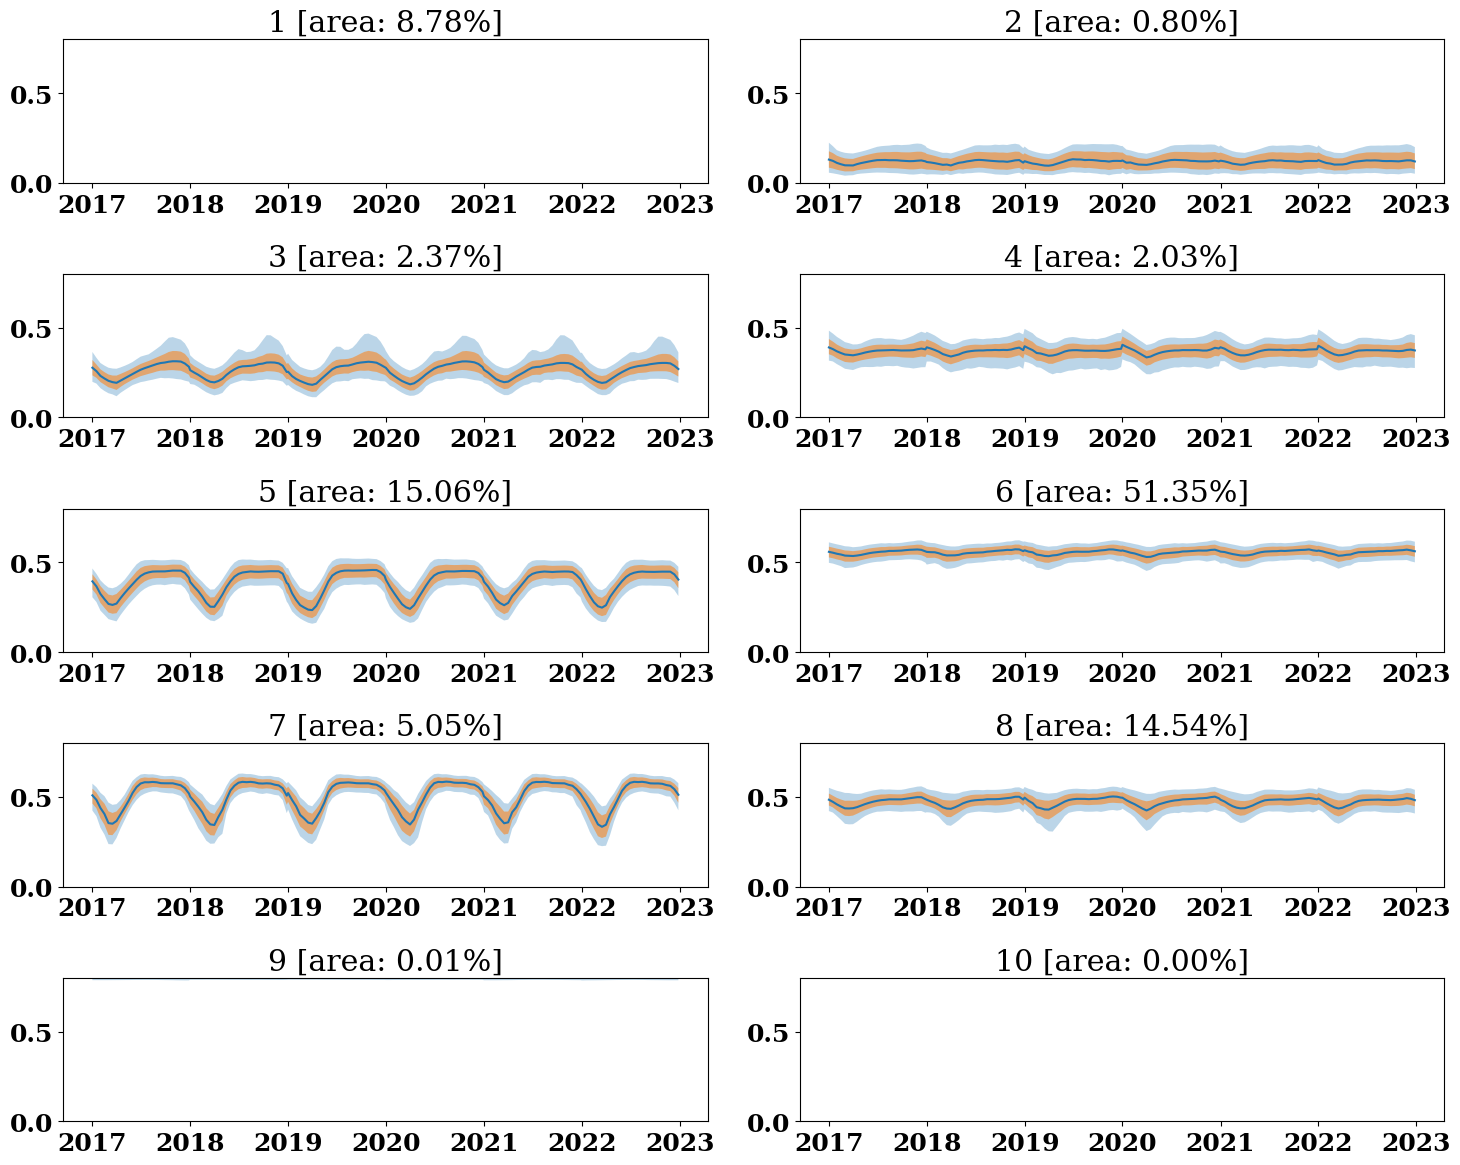

In [22]:
area = [8.78, 0.80, 2.37, 2.03, 15.06, 51.35, 5.05, 14.54, 0.01, 0]

veg_class=1
#veg_class="Cultivated and managed vegetation/agriculture (cropland)"

clust=10
ncols=2
nrows=int(clust/ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(15,12))


for k in range(clust):
    row=int(k/ncols)
    col=k-row*ncols
    #print("Clust: %d of %d Row: %d Col: %d"%(k+1, clust, row, col))
    veg_class=k+1
    axs[row,col].fill_between(univar_stats[univar_stats['label']==veg_class].index, univar_stats[univar_stats['label']==veg_class]['perc_10'], univar_stats[univar_stats['label']==veg_class]['perc_90'], alpha=0.30)
    axs[row,col].fill_between(univar_stats[univar_stats['label']==veg_class].index, univar_stats[univar_stats['label']==veg_class]['first_quart'], univar_stats[univar_stats['label']==veg_class]['third_quart'], alpha=0.55)
    axs[row,col].plot(univar_stats[univar_stats['label']==veg_class].index, univar_stats[univar_stats['label']==veg_class]['median'])
    #axs[row,col].vlines(hmichael_active[1], 0, 1)
    #axs[row,col].axvspan(hmichael_active[0], hmichael_active[-1])
    #axs[row,col].axvspan(phen_years[0], phen_years[1], alpha=0.10, color='red')
    #axs[row,col].axvspan(phen_years[1], phen_years[2], alpha=0.10, color='blue')
    #axs[row,col].axvspan(phen_years[2], phen_years[3], alpha=0.10, color='green')
    #axs[row,col].axvspan(phen_years[3], phen_years[4], alpha=0.10, color='yellow')
    axs[row,col].set_title("%s [area: %0.2f%%]"%(veg_class, area[k]))
    axs[row,col].set_ylim(0,0.8)



#plt.xlim([datetime.date(2018, 1, 1), datetime.date(2018, 12, 31)])


fig.tight_layout()
fig.savefig('cr_pn_ndre_univar.png', bbox_inches='tight', dpi=300)


In [23]:
t2m_era5_stats = pd.DataFrame()
tp_era5_stats = pd.DataFrame()
vpd_era5_stats = pd.DataFrame()
swvl_era5_stats = pd.DataFrame()

# Read all univar files
for y in range(2017, 2020+1):
    for t in range(0,25):
        t2m_era5 = pd.read_csv('/home/jbk/projects/climate/tropics/costa_rica_panama/era5/era5_h10_univar/t2m_era5_h10_%d_%02d.univar'%(y,t), sep=' ')
        t2m_era5['date'] = dates[(y-2017)*25+t]
        t2m_era5_stats = pd.concat([t2m_era5_stats, t2m_era5], ignore_index=True)

        tp_era5 = pd.read_csv('/home/jbk/projects/climate/tropics/costa_rica_panama/era5/era5_h10_univar/tp_era5_h10_%d_%02d.univar'%(y,t), sep=' ')
        tp_era5['date'] = dates[(y-2017)*25+t]
        tp_era5_stats = pd.concat([tp_era5_stats, tp_era5], ignore_index=True)

        swvl_era5 = pd.read_csv('/home/jbk/projects/climate/tropics/costa_rica_panama/era5/era5_h10_univar/swvl_era5_h10_%d_%02d.univar'%(y,t), sep=' ')
        swvl_era5['date'] = dates[(y-2017)*25+t]
        swvl_era5_stats = pd.concat([swvl_era5_stats, swvl_era5], ignore_index=True)
        

        vpd_era5 = pd.read_csv('/home/jbk/projects/climate/tropics/costa_rica_panama/era5/era5_h10_univar/vpd_era5_h10_%d_%02d.univar'%(y,t), sep=' ')
        vpd_era5['date'] = dates[(y-2017)*25+t]
        vpd_era5_stats = pd.concat([vpd_era5_stats, vpd_era5], ignore_index=True)        
# make date the index variable
t2m_era5_stats.set_index('date', inplace=True)
tp_era5_stats.set_index('date', inplace=True)
swvl_era5_stats.set_index('date', inplace=True)
vpd_era5_stats.set_index('date', inplace=True)

5


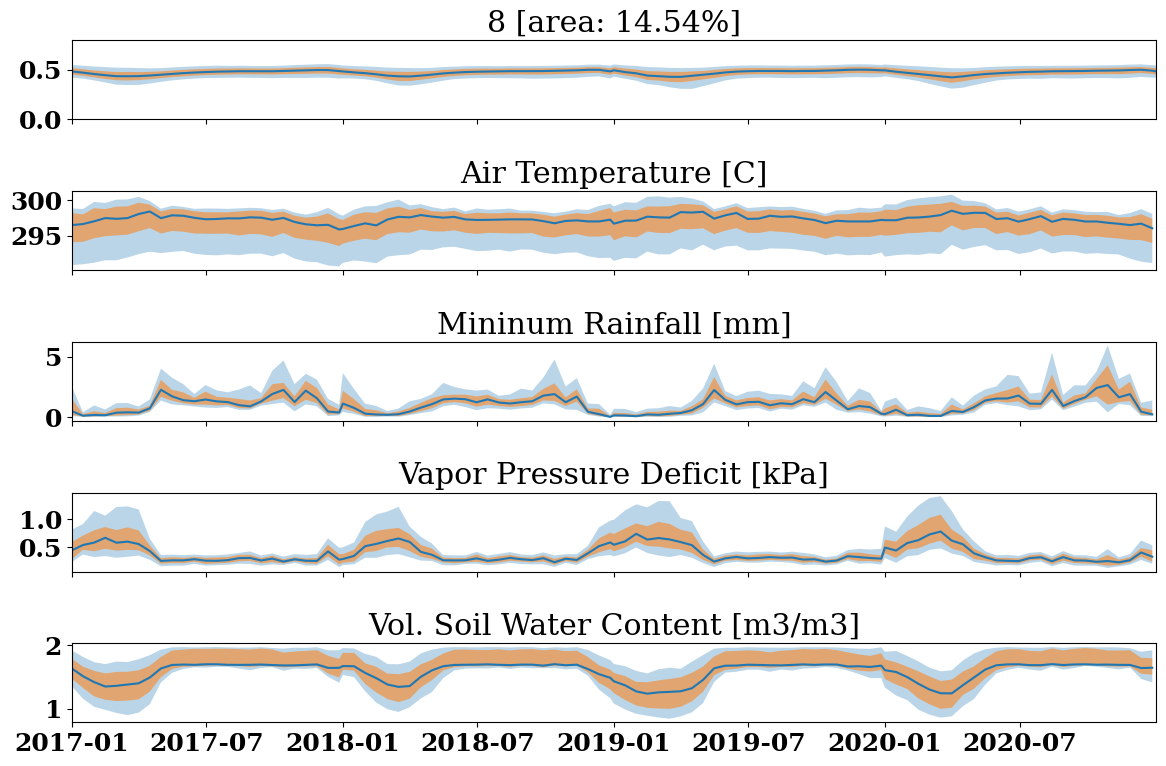

In [24]:
fig, ax = plt.subplots(5, 1, figsize=(12,8), sharex=True)
print(len(ax))
veg_class=8
ax[0].fill_between(univar_stats[univar_stats['label']==veg_class].index, univar_stats[univar_stats['label']==veg_class]['perc_10'], univar_stats[univar_stats['label']==veg_class]['perc_90'], alpha=0.30)
ax[0].fill_between(univar_stats[univar_stats['label']==veg_class].index, univar_stats[univar_stats['label']==veg_class]['first_quart'], univar_stats[univar_stats['label']==veg_class]['third_quart'], alpha=0.55)
ax[0].plot(univar_stats[univar_stats['label']==veg_class].index, univar_stats[univar_stats['label']==veg_class]['median'])
ax[0].set_title("%s [area: %0.2f%%]"%(veg_class, area[veg_class-1]))
ax[0].set_ylim(0,0.8)

ax[1].fill_between(t2m_era5_stats[t2m_era5_stats['label']==veg_class].index, t2m_era5_stats[t2m_era5_stats['label']==veg_class]['perc_10'], t2m_era5_stats[t2m_era5_stats['label']==veg_class]['perc_90'], alpha=0.30)
ax[1].fill_between(t2m_era5_stats[t2m_era5_stats['label']==veg_class].index, t2m_era5_stats[t2m_era5_stats['label']==veg_class]['first_quart'], t2m_era5_stats[t2m_era5_stats['label']==veg_class]['third_quart'], alpha=0.55)
ax[1].plot(t2m_era5_stats[t2m_era5_stats['label']==veg_class].index, t2m_era5_stats[t2m_era5_stats['label']==veg_class]['median'])
ax[1].set_title("Air Temperature [C]")
#ax[1].set_ylim(290,310)

ax[2].fill_between(tp_era5_stats[tp_era5_stats['label']==veg_class].index, tp_era5_stats[tp_era5_stats['label']==veg_class]['perc_10'], tp_era5_stats[tp_era5_stats['label']==veg_class]['perc_90'], alpha=0.30)
ax[2].fill_between(tp_era5_stats[tp_era5_stats['label']==veg_class].index, tp_era5_stats[tp_era5_stats['label']==veg_class]['first_quart'], tp_era5_stats[tp_era5_stats['label']==veg_class]['third_quart'], alpha=0.55)
ax[2].plot(tp_era5_stats[tp_era5_stats['label']==veg_class].index, tp_era5_stats[tp_era5_stats['label']==veg_class]['median'])
ax[2].set_title("Mininum Rainfall [mm]")
#ax[2].set_ylim(290,310)

ax[3].fill_between(vpd_era5_stats[vpd_era5_stats['label']==veg_class].index, vpd_era5_stats[vpd_era5_stats['label']==veg_class]['perc_10'], vpd_era5_stats[vpd_era5_stats['label']==veg_class]['perc_90'], alpha=0.30)
ax[3].fill_between(vpd_era5_stats[vpd_era5_stats['label']==veg_class].index, vpd_era5_stats[vpd_era5_stats['label']==veg_class]['first_quart'], vpd_era5_stats[vpd_era5_stats['label']==veg_class]['third_quart'], alpha=0.55)
ax[3].plot(vpd_era5_stats[vpd_era5_stats['label']==veg_class].index, vpd_era5_stats[vpd_era5_stats['label']==veg_class]['median'])
ax[3].set_title("Vapor Pressure Deficit [kPa]")
#ax[3].set_ylim(290,310)

ax[4].fill_between(swvl_era5_stats[swvl_era5_stats['label']==veg_class].index, swvl_era5_stats[swvl_era5_stats['label']==veg_class]['perc_10'], swvl_era5_stats[swvl_era5_stats['label']==veg_class]['perc_90'], alpha=0.30)
ax[4].fill_between(swvl_era5_stats[swvl_era5_stats['label']==veg_class].index, swvl_era5_stats[swvl_era5_stats['label']==veg_class]['first_quart'], swvl_era5_stats[swvl_era5_stats['label']==veg_class]['third_quart'], alpha=0.55)
ax[4].plot(swvl_era5_stats[swvl_era5_stats['label']==veg_class].index, swvl_era5_stats[swvl_era5_stats['label']==veg_class]['median'])
ax[4].set_title("Vol. Soil Water Content [m3/m3]")
#ax[3].set_ylim(290,310)



plt.xlim([datetime.date(2017, 1, 1), datetime.date(2020, 12, 31)])

fig.tight_layout()
fig.savefig('cr_pn_ndre_univar_h10_%d.png'%(veg_class), bbox_inches='tight', dpi=300)


In [25]:
tp_era5_stats[tp_era5_stats['label']==veg_class]

zone  label  non_null_cells  null_cells  min        max  \
date                                                                  
2017-01-01     8      8        60305467           0    0   4.698595   
2017-01-16     8      8        60305467           0    0   1.852401   
2017-01-31     8      8        60305467           0    0   4.009430   
2017-02-15     8      8        60305467           0    0   1.981450   
2017-03-02     8      8        60305467           0    0   4.711334   
...          ...    ...             ...         ...  ...        ...   
2020-10-27     8      8        62160441           0    0  11.814972   
2020-11-11     8      8        62160441           0    0   8.565549   
2020-11-26     8      8        62160441           0    0   5.993896   
2020-12-11     8      8        62160441           0    0   2.751770   
2020-12-26     8      8        62160441           0    0   3.983060   

                range      mean  mean_of_abs    stddev  variance   coeff_var  \
date                                                                           
2017-01-01   4.698595  0.919394     0.919394  0.934477  0.873247  101.640478   
2017-01-16   1.852401  0.182883     0.182883  0.181912  0.033092   99.469132   
2017-01-31   4.009430  0.377918     0.377918  0.489489  0.239599  129.522585   
2017-02-15   1.981450  0.273685     0.273685  0.306361  0.093857  111.939381   
2017-03-02   4.711334  0.535193     0.535193  0.554494  0.307464  103.606395   
...               ...       ...          ...       ...       ...         ...   
2020-10-27  11.814972  2.973193     2.973193  2.257407  5.095884   75.925318   
2020-11-11   8.565549  1.916818     1.916818  1.042369  1.086533   54.380171   
2020-11-26   5.993896  2.138171     2.138171  1.047092  1.096401   48.971369   
2020-12-11   2.751770  0.558762     0.558762  0.429884  0.184800   76.934979   
2020-12-26   3.983060  0.496991     0.496991  0.569561  0.324400  114.602059   

                     sum       sum_abs  first_quart    median  third_quart  \
date                                                                         
2017-01-01  5.544450e+07  5.544450e+07     0.188284  0.499841     1.534480   
2017-01-16  1.102883e+07  1.102883e+07     0.057317  0.121656     0.254088   
2017-01-31  2.279050e+07  2.279050e+07     0.069691  0.187037     0.489366   
2017-02-15  1.650469e+07  1.650469e+07     0.090988  0.161675     0.348069   
2017-03-02  3.227507e+07  3.227507e+07     0.138198  0.374186     0.748398   
...                  ...           ...          ...       ...          ...   
2020-10-27  1.848150e+08  1.848150e+08     1.031080  2.649940     4.293480   
2020-11-11  1.191503e+08  1.191503e+08     1.249630  1.640660     2.278450   
2020-11-26  1.329096e+08  1.329096e+08     1.331670  1.905190     2.924460   
2020-12-11  3.473291e+07  3.473291e+07     0.205730  0.454459     0.805769   
2020-12-26  3.089315e+07  3.089315e+07     0.146482  0.238447     0.609941   

             perc_10   perc_90  
date                            
2017-01-01  0.091489  2.505120  
2017-01-16  0.030295  0.410963  
2017-01-31  0.026644  0.970059  
2017-02-15  0.046373  0.637833  
2017-03-02  0.059809  1.158650  
...              ...       ...  
2020-10-27  0.395976  5.920270  
2020-11-11  1.081760  3.158770  
2020-11-26  0.991325  3.601680  
2020-12-11  0.106443  1.193810  
2020-12-26  0.088370  1.377750  

[100 rows x 19 columns]

In [26]:
univar_stats = pd.DataFrame()
# Read all univar files
for y in range(2017, 2022+1):
    for t in range(0,25):
        ustat = pd.read_csv('/home/jbk/projects/climate/tropics/costa_rica_panama/k_10/h10_univar/probav_ndre_univar/ndre_probav_interp_landcover_%d_%02d.univar'%(y,t), sep=' ')
        ustat['date'] = dates[(y-2017)*25+t]
        univar_stats = pd.concat([univar_stats, ustat], ignore_index=True)

# make date the index variable
univar_stats.set_index('date', inplace=True)

nrows 4 ncols 4
Clust: 1 Shrubs of 16 Row: 0 Col: 0
Clust: 2 Herbaceous_vegetation of 16 Row: 0 Col: 1
Clust: 3 Cultivated_and_managed_vegetation/agriculture_(cropland) of 16 Row: 0 Col: 2
Clust: 4 Urban/built_up of 16 Row: 0 Col: 3
Clust: 5 Bare/sparse_vegetation of 16 Row: 1 Col: 0
Clust: 6 Permanent_water_bodies of 16 Row: 1 Col: 1
Clust: 7 Herbaceous_wetland of 16 Row: 1 Col: 2
Clust: 8 Closed_forest_evergreen_broad_leaf of 16 Row: 1 Col: 3
Clust: 9 Closed_forest_deciduous_broad_leaf of 16 Row: 2 Col: 0
Clust: 10 Closed_forest_mixed of 16 Row: 2 Col: 1
Clust: 11 Closed_forest_unknown of 16 Row: 2 Col: 2
Clust: 12 Open_forest_evergreen_broad_leaf of 16 Row: 2 Col: 3
Clust: 13 Open_forest_deciduous_broad_leaf of 16 Row: 3 Col: 0
Clust: 14 Open_forest_mixed of 16 Row: 3 Col: 1
Clust: 15 Open_forest_unknown of 16 Row: 3 Col: 2
Clust: 16 Open_sea of 16 Row: 3 Col: 3


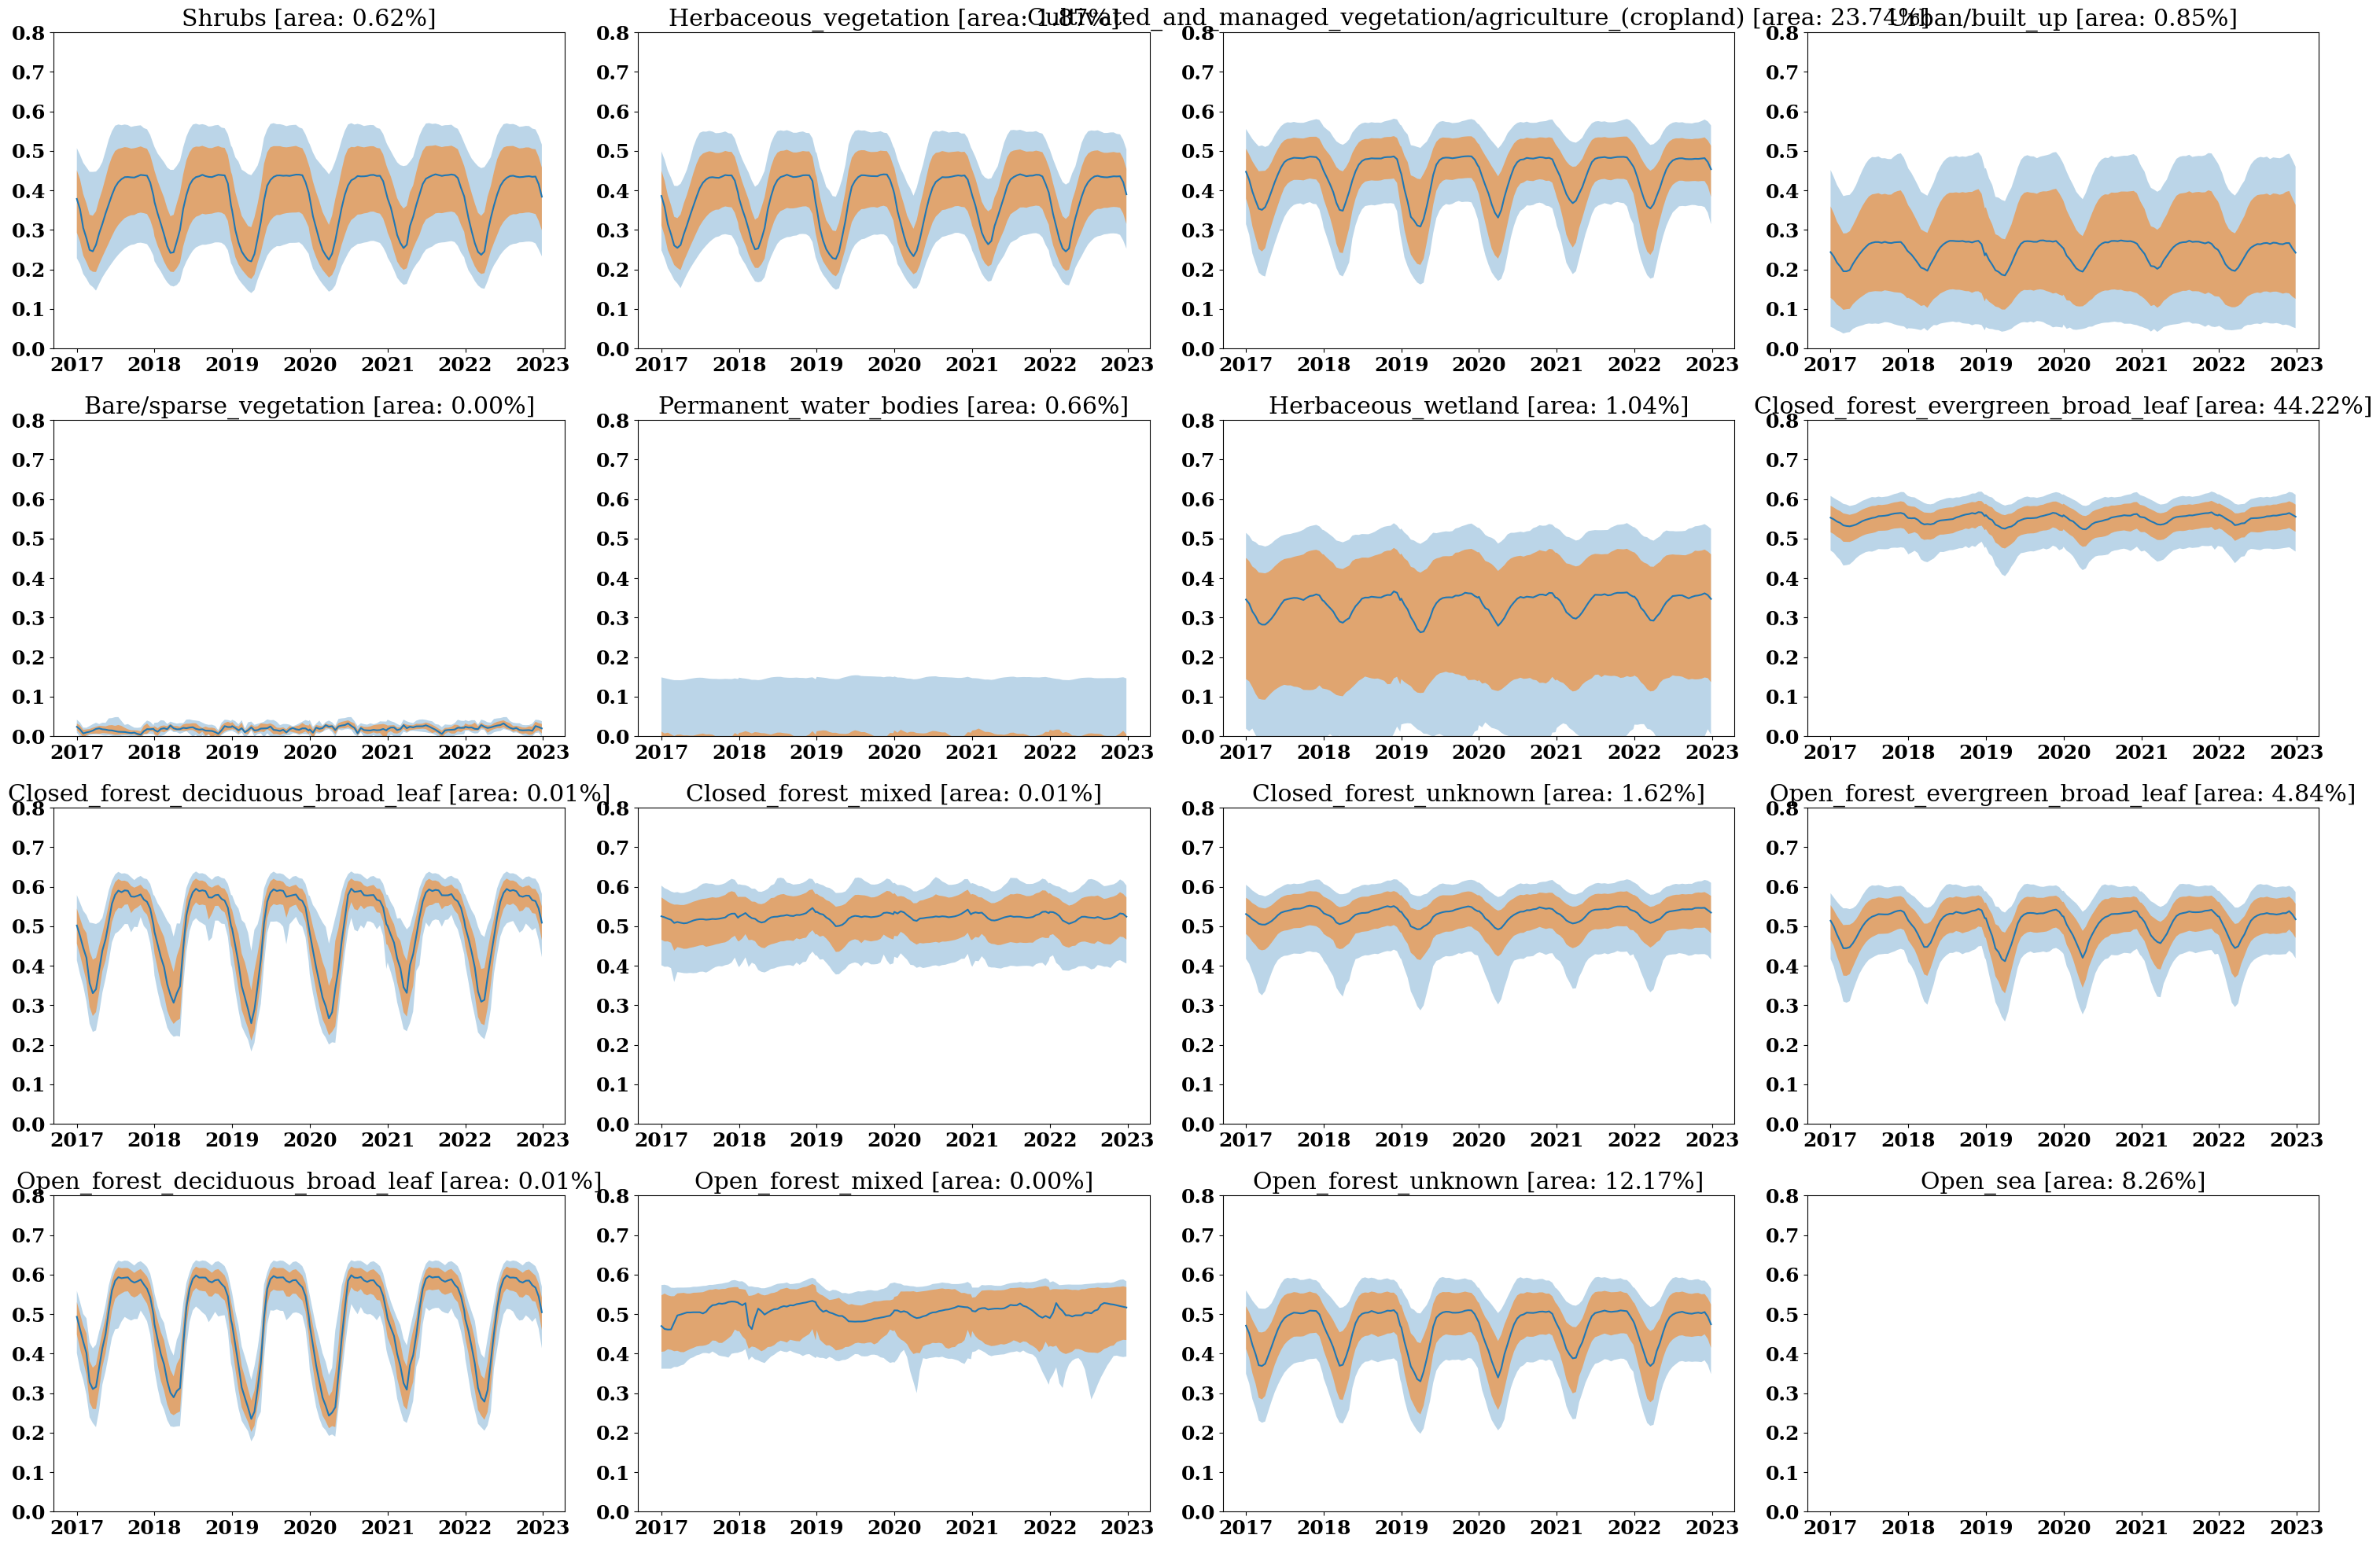

In [27]:
lsarea = [0.62, 1.87, 23.74, 0.85, 0.0, 0.66, 1.04, 44.22, 0.01, 0.01, 1.62, 4.84, 0.01, 0.0, 12.17, 8.26]

veg_class=1
#veg_class="Cultivated and managed vegetation/agriculture (cropland)"
probav_class=["Shrubs", "Herbaceous_vegetation", "Cultivated_and_managed_vegetation/agriculture_(cropland)", "Urban/built_up", "Bare/sparse_vegetation", "Permanent_water_bodies", "Herbaceous_wetland", "Closed_forest_evergreen_broad_leaf", "Closed_forest_deciduous_broad_leaf", "Closed_forest_mixed", "Closed_forest_unknown", "Open_forest_evergreen_broad_leaf", "Open_forest_deciduous_broad_leaf", "Open_forest_mixed", "Open_forest_unknown", "Open_sea"]
clust=len(probav_class)
ncols=4
nrows=int(np.ceil(clust/ncols))
print("nrows %d ncols %d"%(nrows, ncols))
fig, axs = plt.subplots(nrows, ncols, figsize=(30,20))


for k in range(len(probav_class)):
    row=int(k/ncols)
    col=k-row*ncols
    print("Clust: %d %s of %d Row: %d Col: %d"%(k+1, probav_class[k], clust, row, col))
    veg_class=probav_class[k]
    axs[row,col].fill_between(univar_stats[univar_stats['label']==veg_class].index, univar_stats[univar_stats['label']==veg_class]['perc_10'], univar_stats[univar_stats['label']==veg_class]['perc_90'], alpha=0.30)
    axs[row,col].fill_between(univar_stats[univar_stats['label']==veg_class].index, univar_stats[univar_stats['label']==veg_class]['first_quart'], univar_stats[univar_stats['label']==veg_class]['third_quart'], alpha=0.55)
    axs[row,col].plot(univar_stats[univar_stats['label']==veg_class].index, univar_stats[univar_stats['label']==veg_class]['median'])
    #axs[row,col].vlines(hmichael_active[1], 0, 1)
    #axs[row,col].axvspan(hmichael_active[0], hmichael_active[-1])
    #axs[row,col].axvspan(phen_years[0], phen_years[1], alpha=0.10, color='red')
    #axs[row,col].axvspan(phen_years[1], phen_years[2], alpha=0.10, color='blue')
    #axs[row,col].axvspan(phen_years[2], phen_years[3], alpha=0.10, color='green')
    #axs[row,col].axvspan(phen_years[3], phen_years[4], alpha=0.10, color='yellow')
#    axs[row,col].set_title("%s [area: %0.2f%%]"%(veg_class, area[k]))
    axs[row,col].set_title("%s [area: %0.2f%%]"%(veg_class, lsarea[k]) )

    axs[row,col].set_ylim(0,0.8)



#plt.xlim([datetime.date(2018, 1, 1), datetime.date(2018, 12, 31)])


fig.tight_layout()
fig.savefig('cr_pn_probav_ndre_univar.png', bbox_inches='tight', dpi=300)


In [49]:
len(probav_class)

univar_stats#[univar_stats['label']==veg_class]#.index, univar_stats[univar_stats['label']==veg_class]['median']

zone                             label  non_null_cells  \
date                                                                 
2017-01-01     1           Mature_Broadleaf_Forest        61518560   
2017-01-01     2  Secondary_Mixed_Broadleaf_Forest        36410227   
2017-01-01     3                   Mangrove_Forest         2805311   
2017-01-01     4                       Orey_Forest          125006   
2017-01-01     5                     Cativo_Forest           81448   
...          ...                               ...             ...   
2022-12-27    29                    Infrastructure          748440   
2022-12-27    30                            Mining           83905   
2022-12-27    31                 Aquaculture_Ponds          319796   
2022-12-27    32                         Salt_Mine           21765   
2022-12-27    33                           Albinas           12065   

            null_cells       min       max     range      mean  mean_of_abs  \
date                                                                          
2017-01-01     7180671 -0.205418  0.725795  0.931213  0.543498     0.543513   
2017-01-01     3749139 -0.203644  0.733829  0.937473  0.533399     0.533401   
2017-01-01     1866852 -0.179547  0.722200  0.901747  0.537935     0.538022   
2017-01-01       39472  0.224467  0.718398  0.493930  0.526520     0.526520   
2017-01-01        3712 -0.189655  0.681860  0.871515  0.522922     0.522974   
...                ...       ...       ...       ...       ...          ...   
2022-12-27       60437 -0.202602  0.695036  0.897638  0.334533     0.334696   
2022-12-27       20553 -0.158530  0.669767  0.828297  0.286762     0.287099   
2022-12-27       17352 -0.207364  0.647512  0.854876  0.077797     0.102690   
2022-12-27       13053 -0.154243  0.610488  0.764731  0.072562     0.090194   
2022-12-27        2497 -0.056625  0.544349  0.600974  0.173941     0.173985   

              stddev  variance   coeff_var           sum       sum_abs  \
date                                                                     
2017-01-01  0.055618  0.003093   10.233251  3.343523e+07  3.343612e+07   
2017-01-01  0.060932  0.003713   11.423272  1.942117e+07  1.942124e+07   
2017-01-01  0.075667  0.005725   14.066158  1.509074e+06  1.509320e+06   
2017-01-01  0.051181  0.002620    9.720703  6.581813e+04  6.581813e+04   
2017-01-01  0.059276  0.003514   11.335586  4.259092e+04  4.259521e+04   
...              ...       ...         ...           ...           ...   
2022-12-27  0.127799  0.016333   38.202202  2.503779e+05  2.504997e+05   
2022-12-27  0.128686  0.016560   44.875710  2.406076e+04  2.408904e+04   
2022-12-27  0.125028  0.015632  160.710592  2.487914e+04  3.283985e+04   
2022-12-27  0.120311  0.014475  165.804307  1.579309e+03  1.963065e+03   
2022-12-27  0.083006  0.006890   47.720546  2.098596e+03  2.099124e+03   

            first_quart    median  third_quart   perc_10   perc_90  
date                                                                
2017-01-01     0.518494  0.551087     0.578791  0.478801  0.601787  
2017-01-01     0.499686  0.541895     0.576339  0.454717  0.601931  
2017-01-01     0.499279  0.548138     0.589299  0.448704  0.620556  
2017-01-01     0.496914  0.534014     0.563843  0.455732  0.583980  
2017-01-01     0.496233  0.532096     0.560898  0.454717  0.582724  
...                 ...       ...          ...       ...       ...  
2022-12-27     0.251001  0.349421     0.429636  0.152702  0.489936  
2022-12-27     0.211321  0.269486     0.369007  0.116558  0.479139  
2022-12-27     0.016383  0.051505     0.108046 -0.052219  0.262548  
2022-12-27     0.017668  0.051365     0.076618 -0.035736  0.217674  
2022-12-27     0.109602  0.153003     0.221489  0.088708  0.292189  

[4950 rows x 19 columns]

nrows 3 ncols 1
Clust: 1 Closed_forest_evergreen_broad_leaf of 3 Row: 0 Col: 0
Clust: 2 Cultivated_and_managed_vegetation/agriculture_(cropland) of 3 Row: 1 Col: 0
Clust: 3 Open_forest_unknown of 3 Row: 2 Col: 0


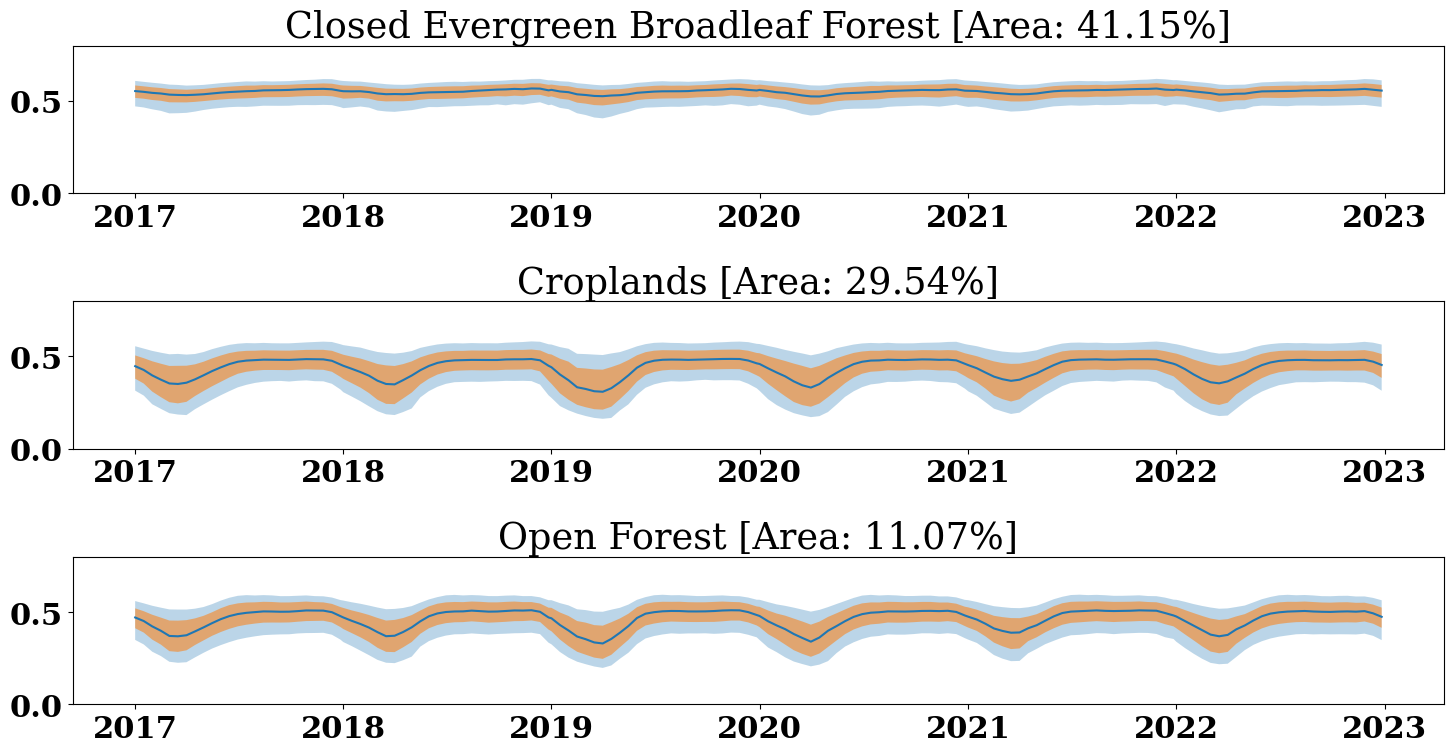

In [72]:
univar_stats = pd.DataFrame()
# Read all univar files
for y in range(2017, 2022+1):
    for t in range(0,25):
        ustat = pd.read_csv('/home/jbk/projects/climate/tropics/costa_rica_panama/k_10/h10_univar/probav_ndre_univar/ndre_probav_interp_landcover_%d_%02d.univar'%(y,t), sep=' ')
        ustat['date'] = dates[(y-2017)*25+t]
        univar_stats = pd.concat([univar_stats, ustat], ignore_index=True)

# make date the index variable
univar_stats.set_index('date', inplace=True)
#lsarea = [44.22, 23.74, 12.17]
lsarea = [41.15, 29.54, 11.07]
veg_class=1
#veg_class="Cultivated and managed vegetation/agriculture (cropland)"
#probav_class=["Shrubs", "Herbaceous_vegetation", "Cultivated_and_managed_vegetation/agriculture_(cropland)", "Urban/built_up", "Bare/sparse_vegetation", "Permanent_water_bodies", "Herbaceous_wetland", "Closed_forest_evergreen_broad_leaf", "Closed_forest_deciduous_broad_leaf", "Closed_forest_mixed", "Closed_forest_unknown", "Open_forest_evergreen_broad_leaf", "Open_forest_deciduous_broad_leaf", "Open_forest_mixed", "Open_forest_unknown", "Open_sea"]
probav_class=["Closed_forest_evergreen_broad_leaf", "Cultivated_and_managed_vegetation/agriculture_(cropland)", "Open_forest_unknown"]
labels = ["Closed Evergreen Broadleaf Forest", "Croplands", "Open Forest"]
clust=len(probav_class)
ncols=1
nrows=int(np.ceil(clust/ncols))
print("nrows %d ncols %d"%(nrows, ncols))
fig, axs = plt.subplots(3, 1, figsize=(15,8)) #, dpi=300)


for k in range(len(probav_class)):
    row=int(k/ncols)
    col=k-row*ncols
    print("Clust: %d %s of %d Row: %d Col: %d"%(k+1, probav_class[k], clust, row, col))
    veg_class=probav_class[k]
    axs[row].fill_between(univar_stats[univar_stats['label']==veg_class].index, univar_stats[univar_stats['label']==veg_class]['perc_10'], univar_stats[univar_stats['label']==veg_class]['perc_90'], alpha=0.30)
    axs[row].fill_between(univar_stats[univar_stats['label']==veg_class].index, univar_stats[univar_stats['label']==veg_class]['first_quart'], univar_stats[univar_stats['label']==veg_class]['third_quart'], alpha=0.55)
    axs[row].plot(univar_stats[univar_stats['label']==veg_class].index, univar_stats[univar_stats['label']==veg_class]['median'])
    #axs[row,col].vlines(hmichael_active[1], 0, 1)
    #axs[row,col].axvspan(hmichael_active[0], hmichael_active[-1])
    #axs[row,col].axvspan(phen_years[0], phen_years[1], alpha=0.10, color='red')
    #axs[row,col].axvspan(phen_years[1], phen_years[2], alpha=0.10, color='blue')
    #axs[row,col].axvspan(phen_years[2], phen_years[3], alpha=0.10, color='green')
    #axs[row,col].axvspan(phen_years[3], phen_years[4], alpha=0.10, color='yellow')
#    axs[row,col].set_title("%s [area: %0.2f%%]"%(veg_class, area[k]))
    axs[row].set_title("%s [Area: %0.2f%%]"%(labels[k], lsarea[k]) )

    axs[row].set_ylim(0,0.8)



#plt.xlim([datetime.date(2018, 1, 1), datetime.date(2018, 12, 31)])


fig.tight_layout()
fig.savefig('cr_pn_probav_ndre_subset_univar.png', bbox_inches='tight') #, dpi=300)


In [29]:
univar_stats = pd.DataFrame()
# Read all univar files
for y in range(2017, 2022+1):
    for t in range(0,25):
        ustat = pd.read_csv('/home/jbk/projects/climate/tropics/costa_rica_panama/k_10/h10_univar/panama_landcover_univar/ndre_panama_interp_landcover_%d_%02d.univar'%(y,t), sep=' ')
        ustat['date'] = dates[(y-2017)*25+t]
        univar_stats = pd.concat([univar_stats, ustat], ignore_index=True)

# make date the index variable
univar_stats.set_index('date', inplace=True)

nrows 8 ncols 4
Clust: 1 Mature_Broadleaf_Forest of 32 Row: 0 Col: 0
Clust: 2 Secondary_Mixed_Broadleaf_Forest of 32 Row: 0 Col: 1
Clust: 3 Mangrove_Forest of 32 Row: 0 Col: 2
Clust: 4 Orey_Forest of 32 Row: 0 Col: 3
Clust: 5 Cativo_Forest of 32 Row: 1 Col: 0
Clust: 6 Rafia_Forest of 32 Row: 1 Col: 1
Clust: 7 Coniferous_Forest_Broadleaf_Forest of 32 Row: 1 Col: 2
Clust: 8 Shrubs_and_Bushes of 32 Row: 1 Col: 3
Clust: 9 Herbaceous_Vegetation of 32 Row: 2 Col: 0
Clust: 10 Flooded_Vegetation of 32 Row: 2 Col: 1
Clust: 11 Rocks_and_Bare_Soils of 32 Row: 2 Col: 2
Clust: 12 Sand_Beaches of 32 Row: 2 Col: 3
Clust: 13 Coffee of 32 Row: 3 Col: 0
Clust: 14 Citric of 32 Row: 3 Col: 1
Clust: 15 Oil_Palm of 32 Row: 3 Col: 2
Clust: 16 Banana of 32 Row: 3 Col: 3
Clust: 17 Permanent_Crops of 32 Row: 4 Col: 0
Clust: 18 Rice of 32 Row: 4 Col: 1
Clust: 19 Sugar_Cane of 32 Row: 4 Col: 2
Clust: 20 Mixed_Horticulture of 32 Row: 4 Col: 3
Clust: 21 Corn of 32 Row: 5 Col: 0
Clust: 22 Pineapple of 32 Row: 5 Col:

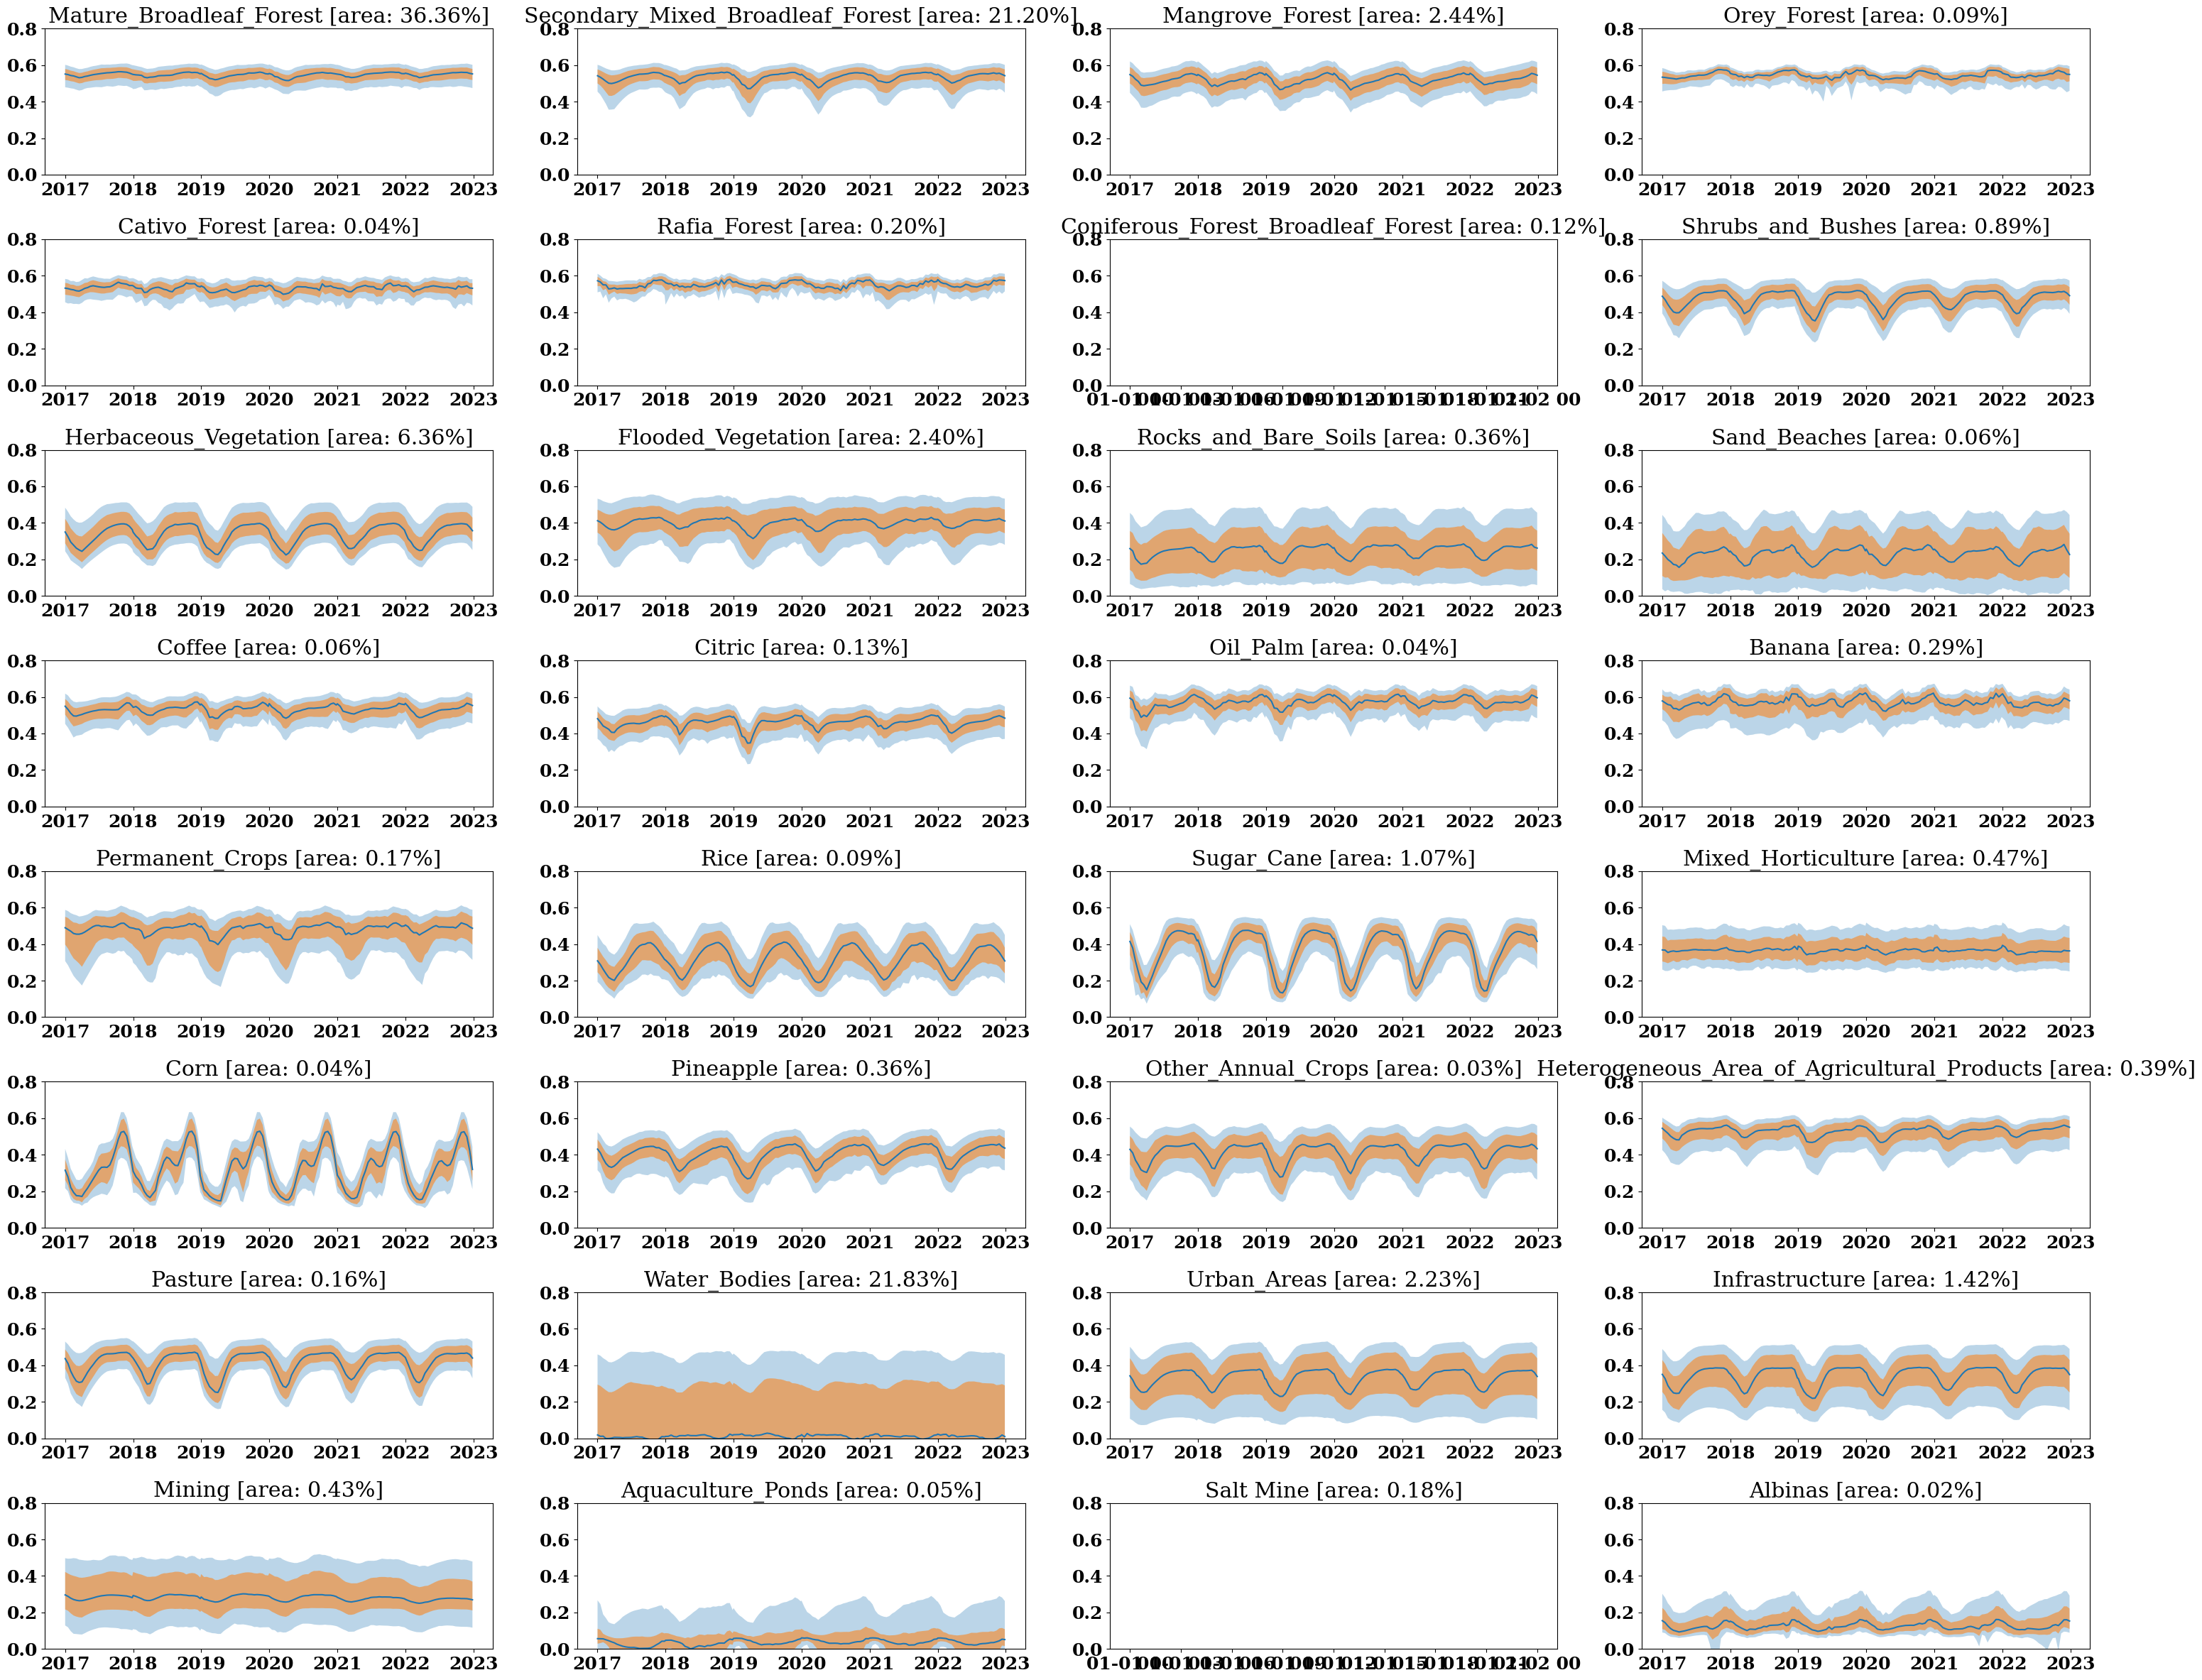

In [30]:
lsarea = [36.36, 21.20, 2.44, 0.09, 0.04, 0.20, 0.12, 0.89, 6.36, 2.40, 0.36, 0.06, 0.06, 0.13, 0.04, 0.29, 0.17, 0.09, 1.07, 0.47, 0.04, 0.36, 0.03, 0.39, 0.16, 21.83, 2.23, 1.42, 0.43, 0.05, 0.18, 0.02, 0.01]

veg_class=1
#veg_class="Cultivated and managed vegetation/agriculture (cropland)"
panamalandcover_class=["Mature_Broadleaf_Forest", "Secondary_Mixed_Broadleaf_Forest", "Mangrove_Forest", "Orey_Forest", "Cativo_Forest", "Rafia_Forest", "Coniferous_Forest_Broadleaf_Forest", "Shrubs_and_Bushes", "Herbaceous_Vegetation", "Flooded_Vegetation", "Rocks_and_Bare_Soils", "Sand_Beaches", "Coffee", "Citric", "Oil_Palm", "Banana", "Permanent_Crops", "Rice", "Sugar_Cane", "Mixed_Horticulture", "Corn", "Pineapple", "Other_Annual_Crops", "Heterogeneous_Area_of_Agricultural_Products", "Pasture", "Water_Bodies", "Urban_Areas", "Infrastructure", "Mining", "Aquaculture_Ponds", "Salt Mine", "Albinas"]
clust=len(panamalandcover_class)
ncols=4
nrows=int(np.ceil(clust/ncols))
print("nrows %d ncols %d"%(nrows, ncols))
fig, axs = plt.subplots(nrows, ncols, figsize=(30,24))


for k in range(len(panamalandcover_class)):
    row=int(k/ncols)
    col=k-row*ncols
    print("Clust: %d %s of %d Row: %d Col: %d"%(k+1, panamalandcover_class[k], clust, row, col))
    veg_class=panamalandcover_class[k]
    axs[row,col].fill_between(univar_stats[univar_stats['label']==veg_class].index, univar_stats[univar_stats['label']==veg_class]['perc_10'], univar_stats[univar_stats['label']==veg_class]['perc_90'], alpha=0.30)
    axs[row,col].fill_between(univar_stats[univar_stats['label']==veg_class].index, univar_stats[univar_stats['label']==veg_class]['first_quart'], univar_stats[univar_stats['label']==veg_class]['third_quart'], alpha=0.55)
    axs[row,col].plot(univar_stats[univar_stats['label']==veg_class].index, univar_stats[univar_stats['label']==veg_class]['median'])
    #axs[row,col].vlines(hmichael_active[1], 0, 1)
    #axs[row,col].axvspan(hmichael_active[0], hmichael_active[-1])
    #axs[row,col].axvspan(phen_years[0], phen_years[1], alpha=0.10, color='red')
    #axs[row,col].axvspan(phen_years[1], phen_years[2], alpha=0.10, color='blue')
    #axs[row,col].axvspan(phen_years[2], phen_years[3], alpha=0.10, color='green')
    #axs[row,col].axvspan(phen_years[3], phen_years[4], alpha=0.10, color='yellow')
#    axs[row,col].set_title("%s [area: %0.2f%%]"%(veg_class, area[k]))
    axs[row,col].set_title("%s [area: %0.2f%%]"%(veg_class, lsarea[k]))

    axs[row,col].set_ylim(0,0.8)
    #axs[row,col].set_xlim([datetime.date(2018, 1, 1), datetime.date(2018, 12, 31)])



#plt.xlim([datetime.date(2018, 1, 1), datetime.date(2018, 12, 31)])


fig.tight_layout()
fig.savefig('pn_pnlandcover_ndre_univar.png', bbox_inches='tight', dpi=300)


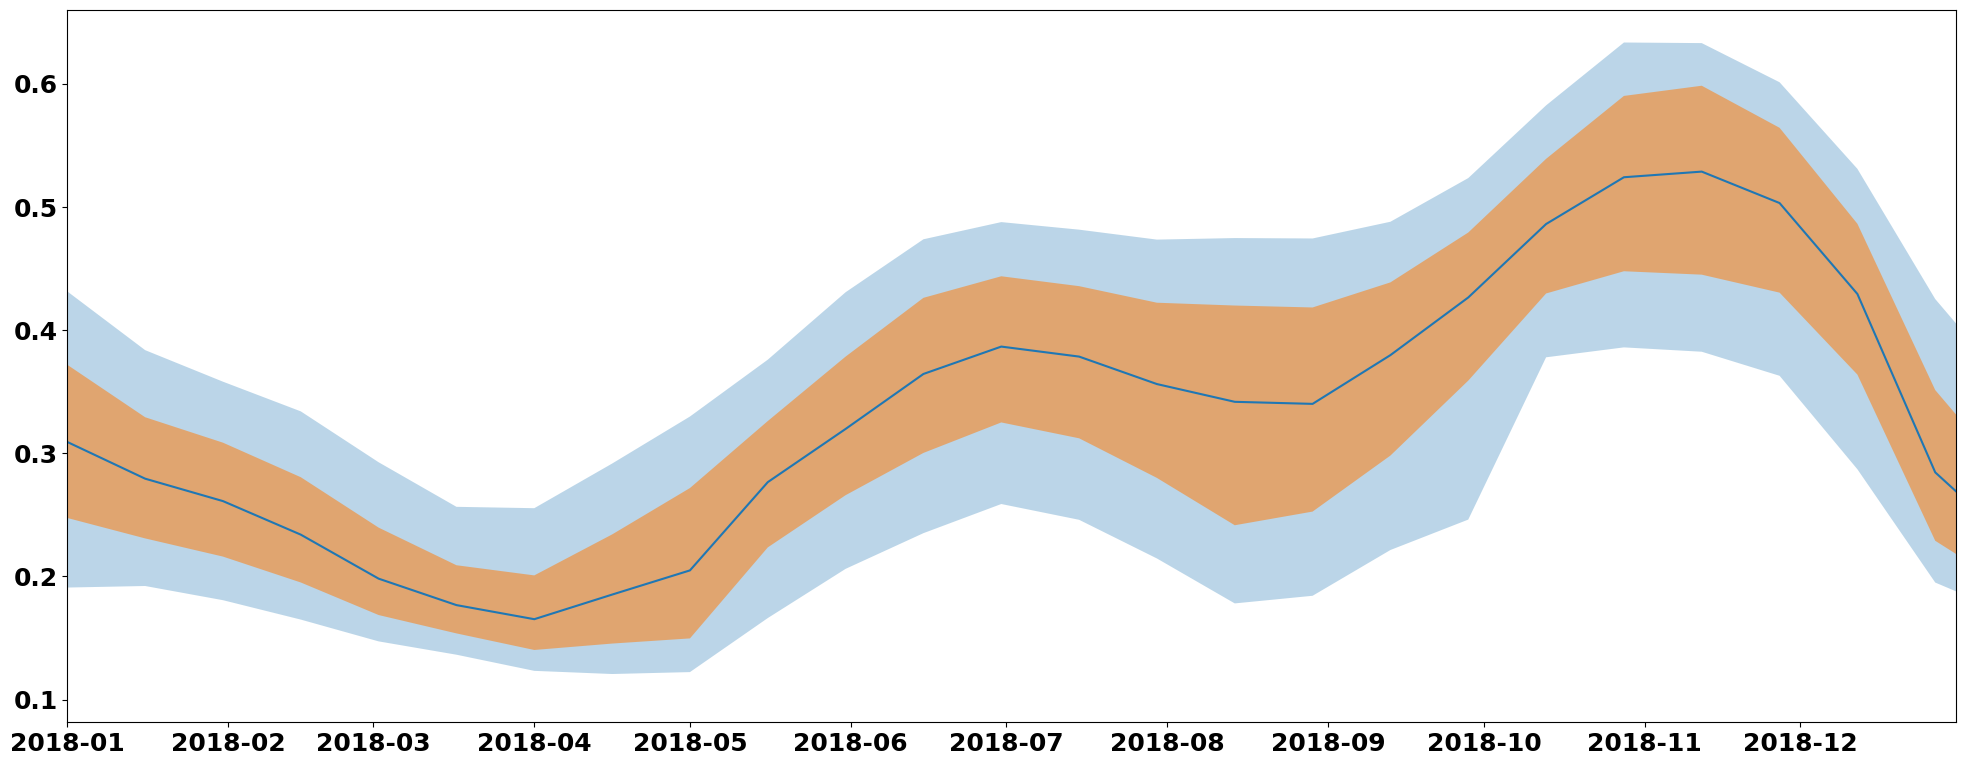

In [264]:
fig, ax = plt.subplots(figsize=(20,8))
veg_class="Corn"
ax.fill_between(univar_stats[univar_stats['label']==veg_class].index, univar_stats[univar_stats['label']==veg_class]['perc_10'], univar_stats[univar_stats['label']==veg_class]['perc_90'], alpha=0.30)
ax.fill_between(univar_stats[univar_stats['label']==veg_class].index, univar_stats[univar_stats['label']==veg_class]['first_quart'], univar_stats[univar_stats['label']==veg_class]['third_quart'], alpha=0.55)
ax.plot(univar_stats[univar_stats['label']==veg_class].index, univar_stats[univar_stats['label']==veg_class]['median'])
ax.set_xlim([datetime.date(2018, 1, 1), datetime.date(2018, 12, 31)])
fig.tight_layout()
fig.savefig('pn_pnlandcover_ndre_univar_corn.png', bbox_inches='tight', dpi=300)


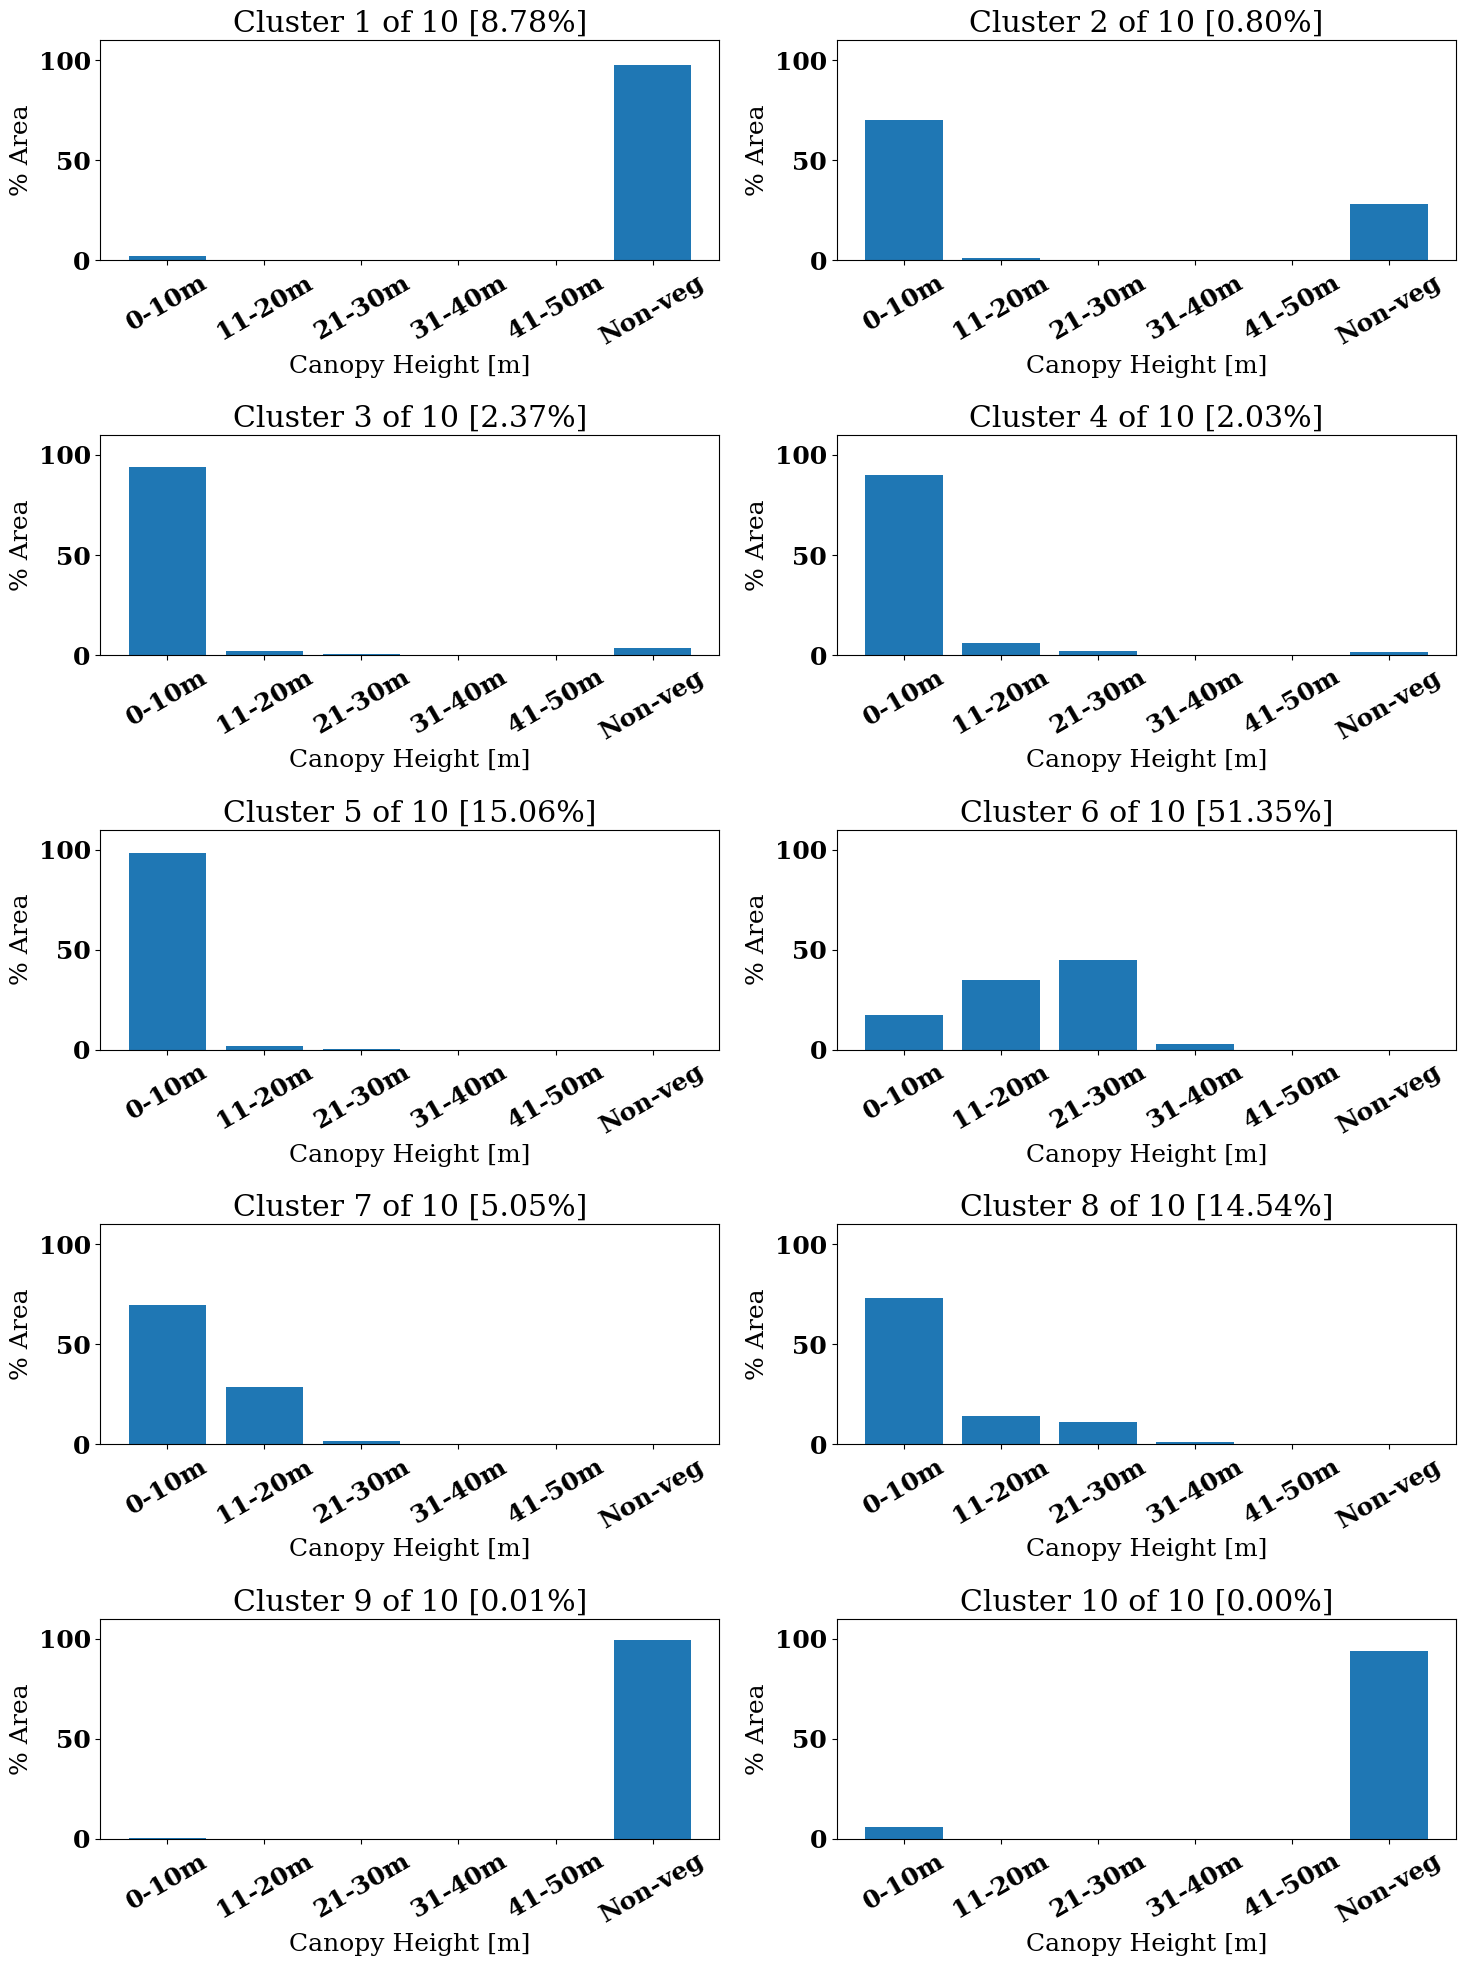

In [32]:
nclust=10
ncols=2
nrows=int(nclust/ncols)
xlabels = ["0-10m", "11-20m", "21-30m", "31-40m", "41-50m", "Non-veg"]
xtickval = [1,2,3,4,5,6]
k10_height = pd.read_csv('/home/jbk/projects/climate/tropics/costa_rica_panama/k_10/h10_univar/costa_rica_panama_interp.h10_height.report.table', delimiter=" ")
fig, ax = plt.subplots(nrows, ncols, figsize=(15,20))

clr=['blue', 'blue', 'yellow', 'yellow', 'yellow', 'green', 'brown', 'yellow', 'blue', 'blue']
lctype=['Open Water', 'Urban', 'Croplands', 'Croplands', 'Croplands', 'Evergreen Broadleaf Forest', 'Open Forest', 'Croplands', 'Open Water', 'Open Water']
fraction=[8.78, 0.80, 2.37, 2.03, 15.06, 51.35, 5.05, 14.54, 0.01, 0.0]
ylim=[1.5, 0.05, 1.5, 1.5, 1, 1, 1, 1, 1.5, 0.05]

for k in range(nclust):
    r=int(k/ncols)
    c=int(k%ncols)
#    ax[r,c].bar(xtickval, k10_height.iloc[k+1,1:].astype(int)/1000000, color=clr[k])
    ax[r,c].bar(xtickval, k10_height[k10_height.Cluster == k+1][xlabels].values.flatten()) #, color=clr[k])

    
    ax[r,c].set_ylim([0,110])
    ax[r,c].set_xticks(xtickval)
    ax[r,c].set_xticklabels(xlabels, rotation=30)
    ax[r,c].set_ylabel("% Area")
    ax[r,c].set_xlabel("Canopy Height [m]")
    ax[r,c].set_title('Cluster %d of %d [%0.2f%%]'%(k+1, nclust, fraction[k])) #, lctype[k]))
plt.tight_layout()
plt.savefig('h10_canopyheight.png', dpi=300)


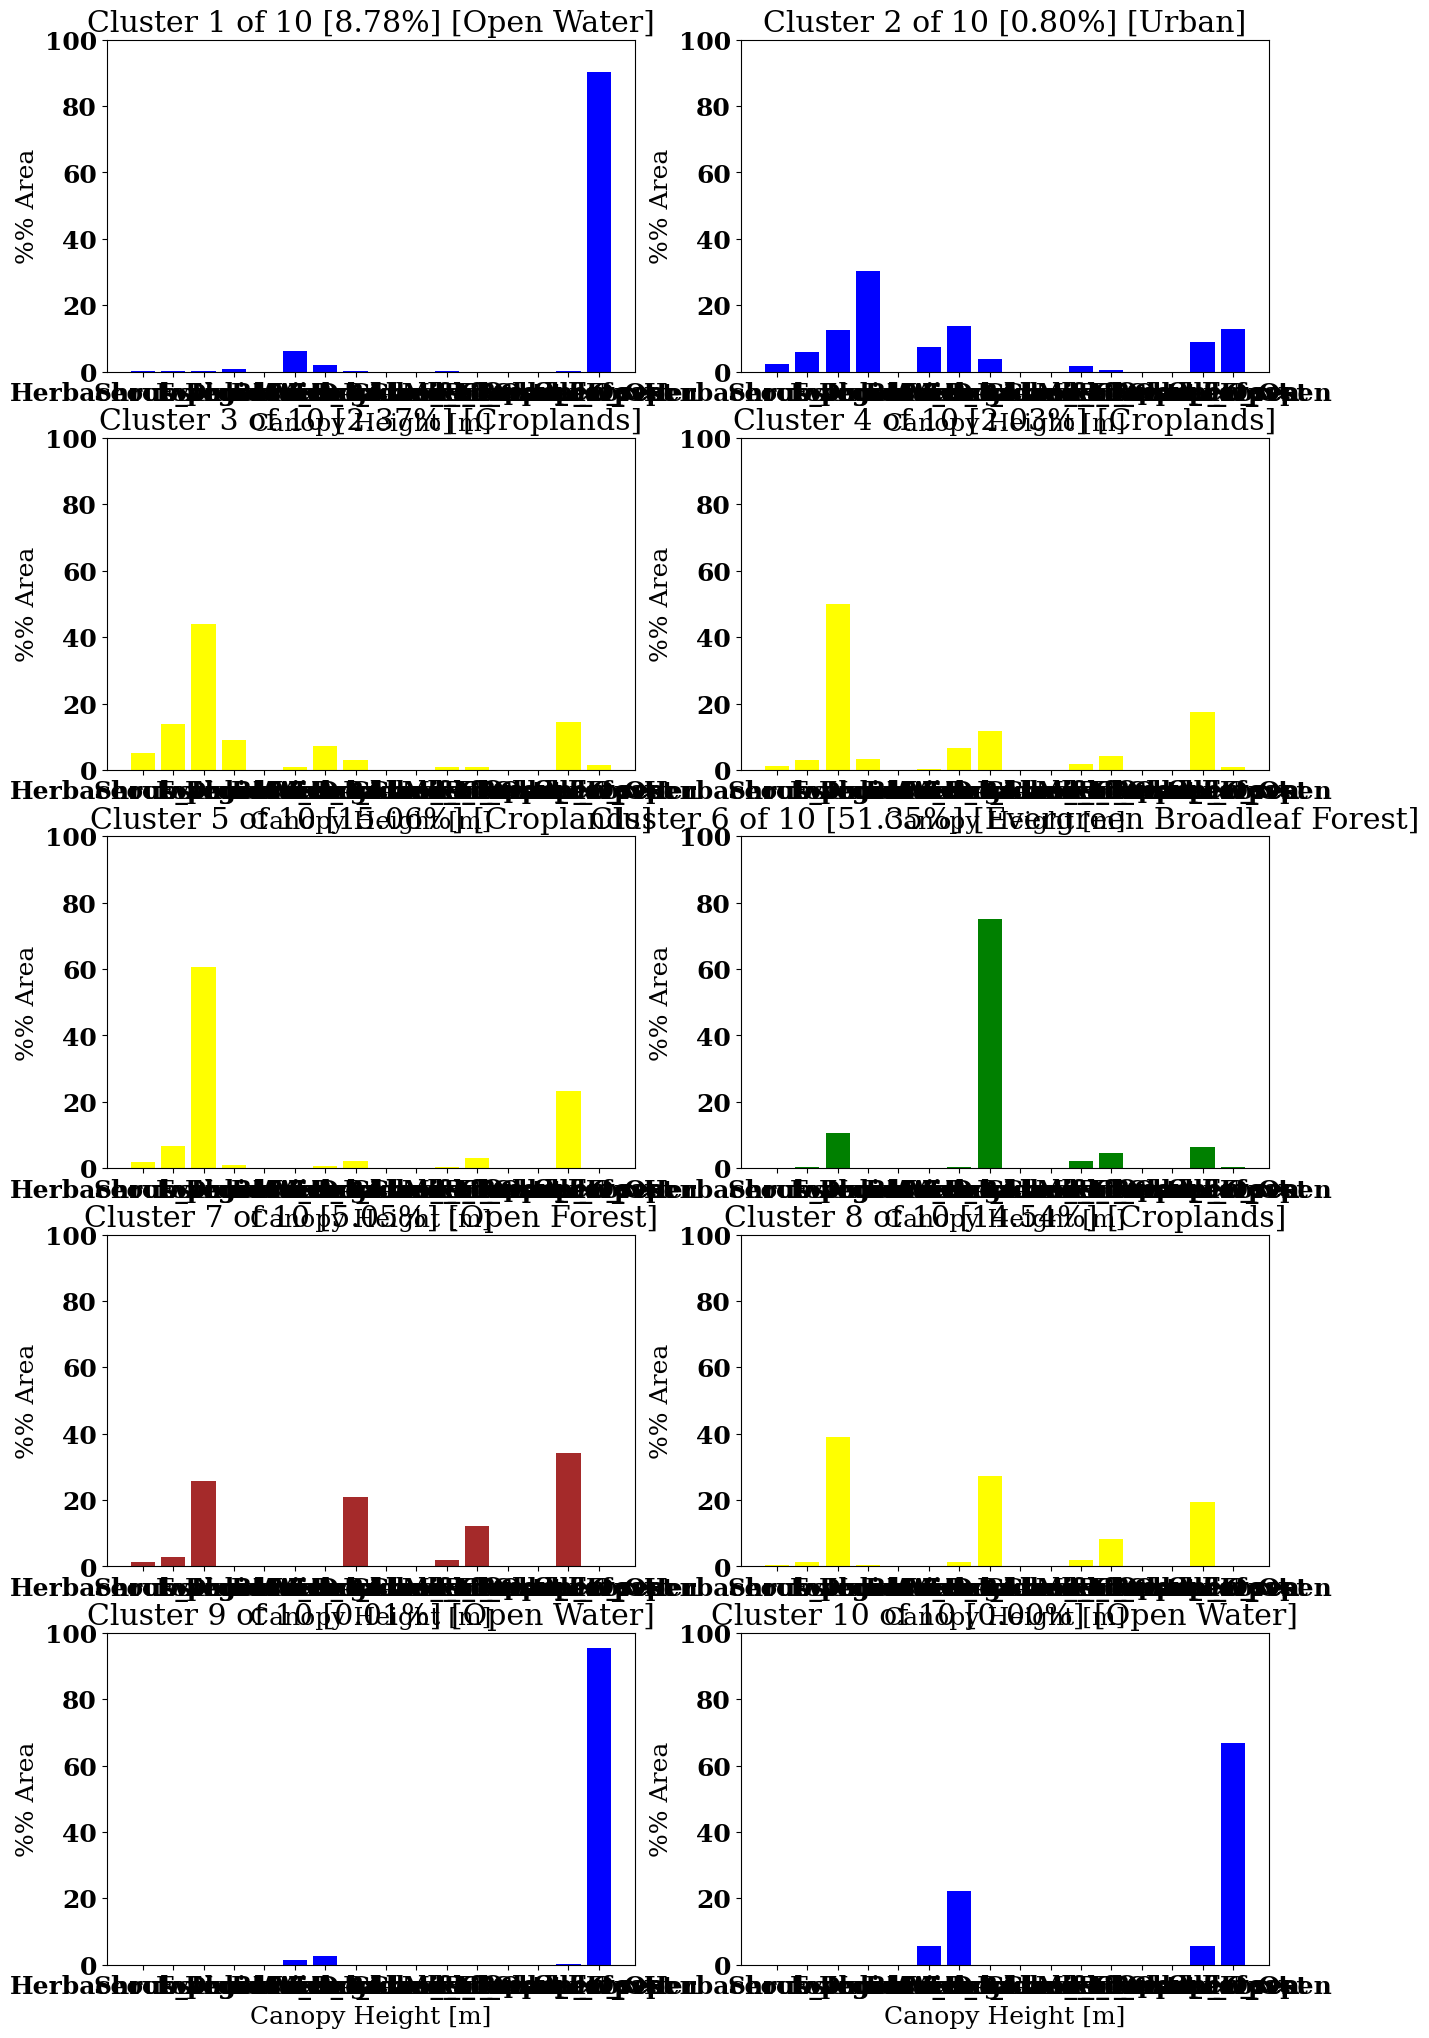

In [33]:
nclust=10
ncols=2
nrows=int(nclust/ncols)
xlabels = ["Shrubs", "Herbaceous_vegetation", "cropland", "Urban", "Bare", "Water", "Wetland", "Evergreen_Broadleaf_Closed", "Deciduous_Broadleaf_Closed", "Mixed_Closed_Forest", "Closed_Forest", "Evergreen_Broadleaf_Open", "Deciduous_Broadleaf_Open", "Mixed_Open_Forest", "Open_Forest", "Open_sea"]
xtickval = np.arange(1,len(xlabels)+1)
k10_height = pd.read_csv('/home/jbk/projects/climate/tropics/costa_rica_panama/k_10/h10_univar/costa_rica_panama_interp.h10_probav.report.table', delimiter=" ")
fig, ax = plt.subplots(nrows, ncols, figsize=(15,25))

clr=['blue', 'blue', 'yellow', 'yellow', 'yellow', 'green', 'brown', 'yellow', 'blue', 'blue']
lctype=['Open Water', 'Urban', 'Croplands', 'Croplands', 'Croplands', 'Evergreen Broadleaf Forest', 'Open Forest', 'Croplands', 'Open Water', 'Open Water']
fraction=[8.78, 0.80, 2.37, 2.03, 15.06, 51.35, 5.05, 14.54, 0.01, 0.0]
ylim=[1.5, 0.05, 1.5, 1.5, 1, 1, 1, 1, 1.5, 0.05]

for k in range(nclust):
    r=int(k/ncols)
    c=int(k%ncols)
#    ax[r,c].bar(xtickval, k10_height.iloc[k+1,1:].astype(int)/1000000, color=clr[k])
    ax[r,c].bar(xtickval, k10_height[k10_height.Cluster == k+1][xlabels].values.flatten(), color=clr[k])

    
    ax[r,c].set_ylim([0,100])
    ax[r,c].set_xticks(xtickval)
    ax[r,c].set_xticklabels(xlabels)
    ax[r,c].set_ylabel("%% Area") # [Million Hectares]")
    ax[r,c].set_xlabel("Canopy Height [m]")
    ax[r,c].set_title('Cluster %d of %d [%0.2f%%] [%s]'%(k+1, nclust, fraction[k], lctype[k]))
plt.savefig('h10_probav.png', dpi=300)


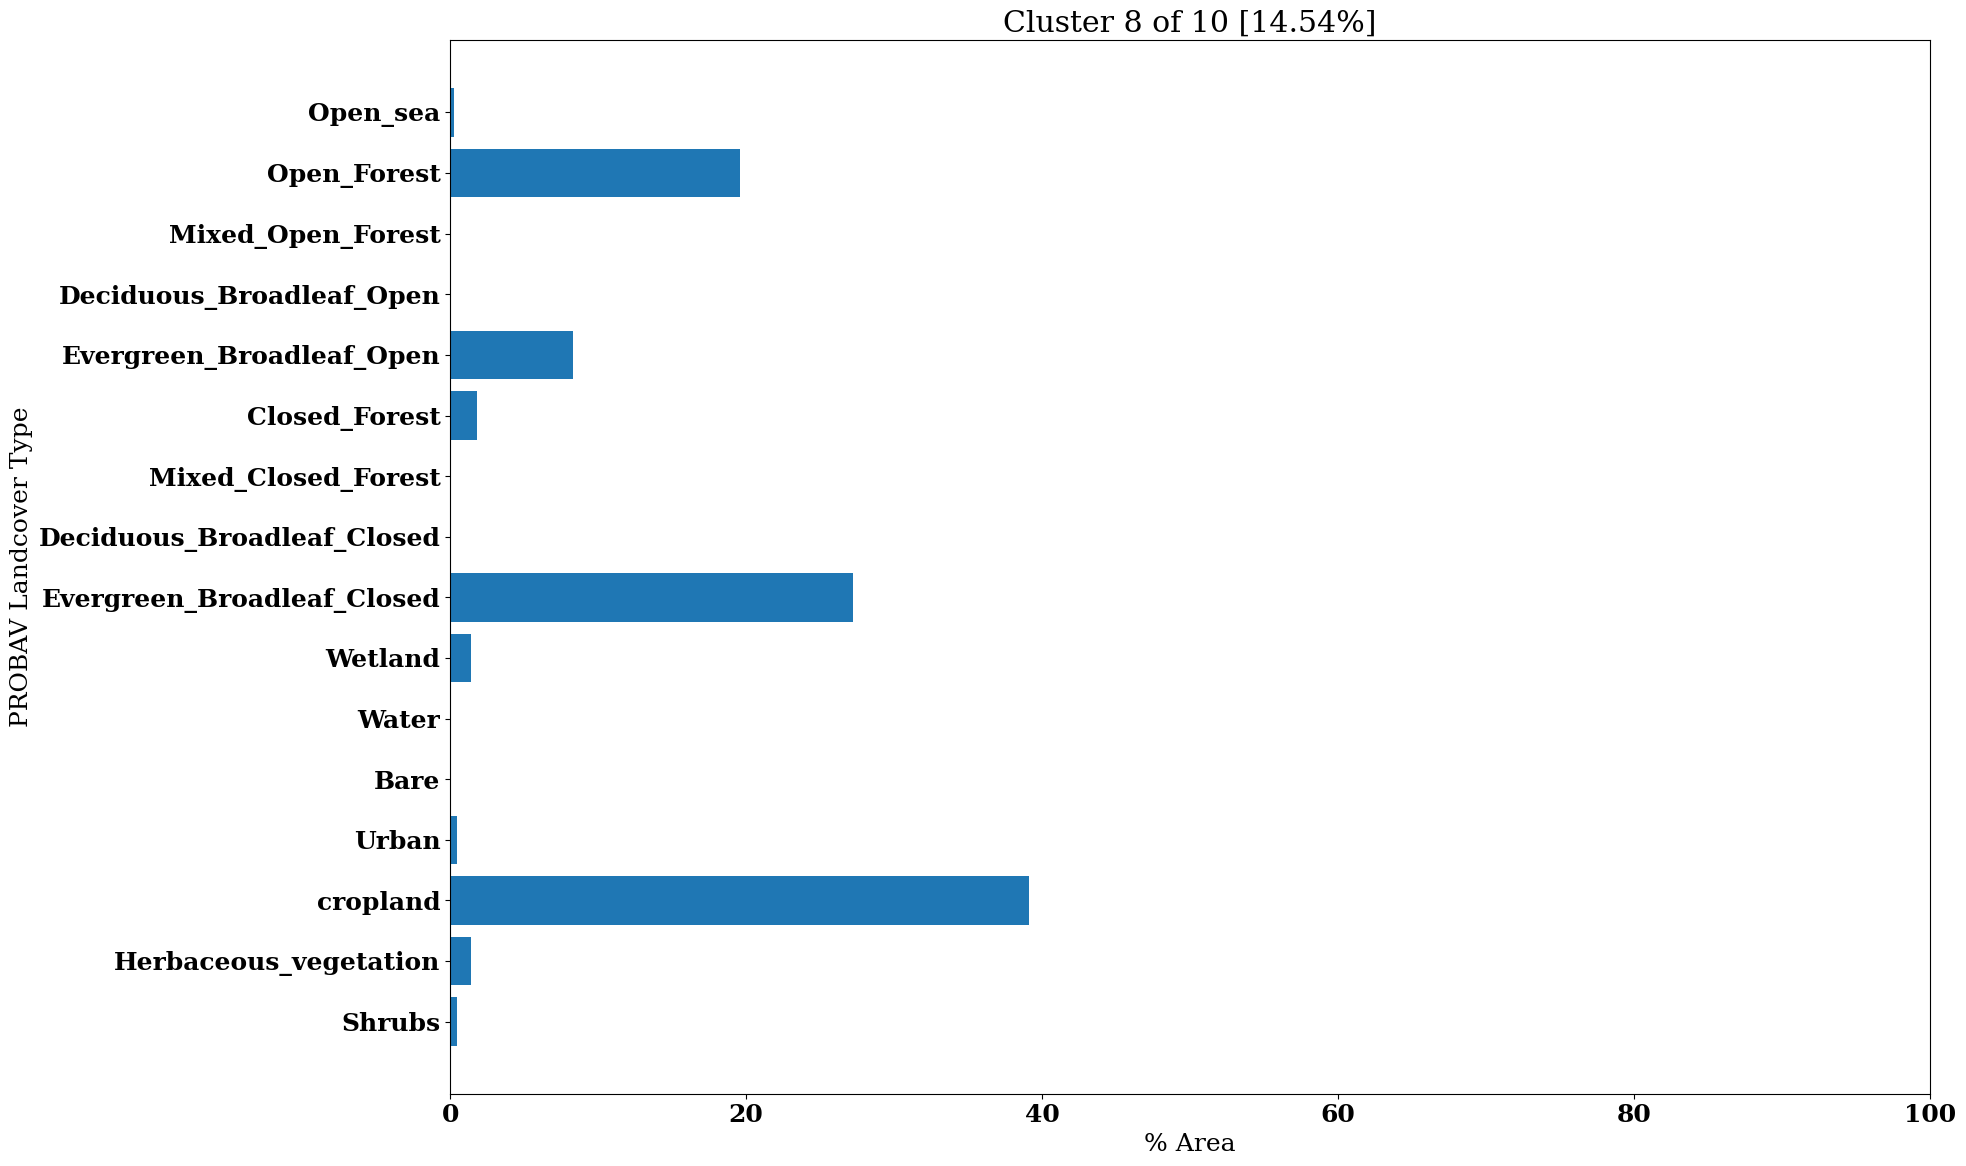

In [34]:
fig, ax = plt.subplots(figsize=(20,12))
k=7
ax.barh(xtickval, k10_height[k10_height.Cluster == k+1][xlabels].values.flatten()) #, color=clr[k])
ax.set_xlim([0,100])
ax.set_yticks(xtickval)
ax.set_yticklabels(xlabels) #, rotation=60)
ax.set_xlabel("% Area") # [Million Hectares]")
ax.set_ylabel("PROBAV Landcover Type")
ax.set_title('Cluster %d of %d [%0.2f%%]'%(k+1, nclust, fraction[k]))
plt.tight_layout()
plt.savefig('h10_probav_%d.png'%(k+1), dpi=300)


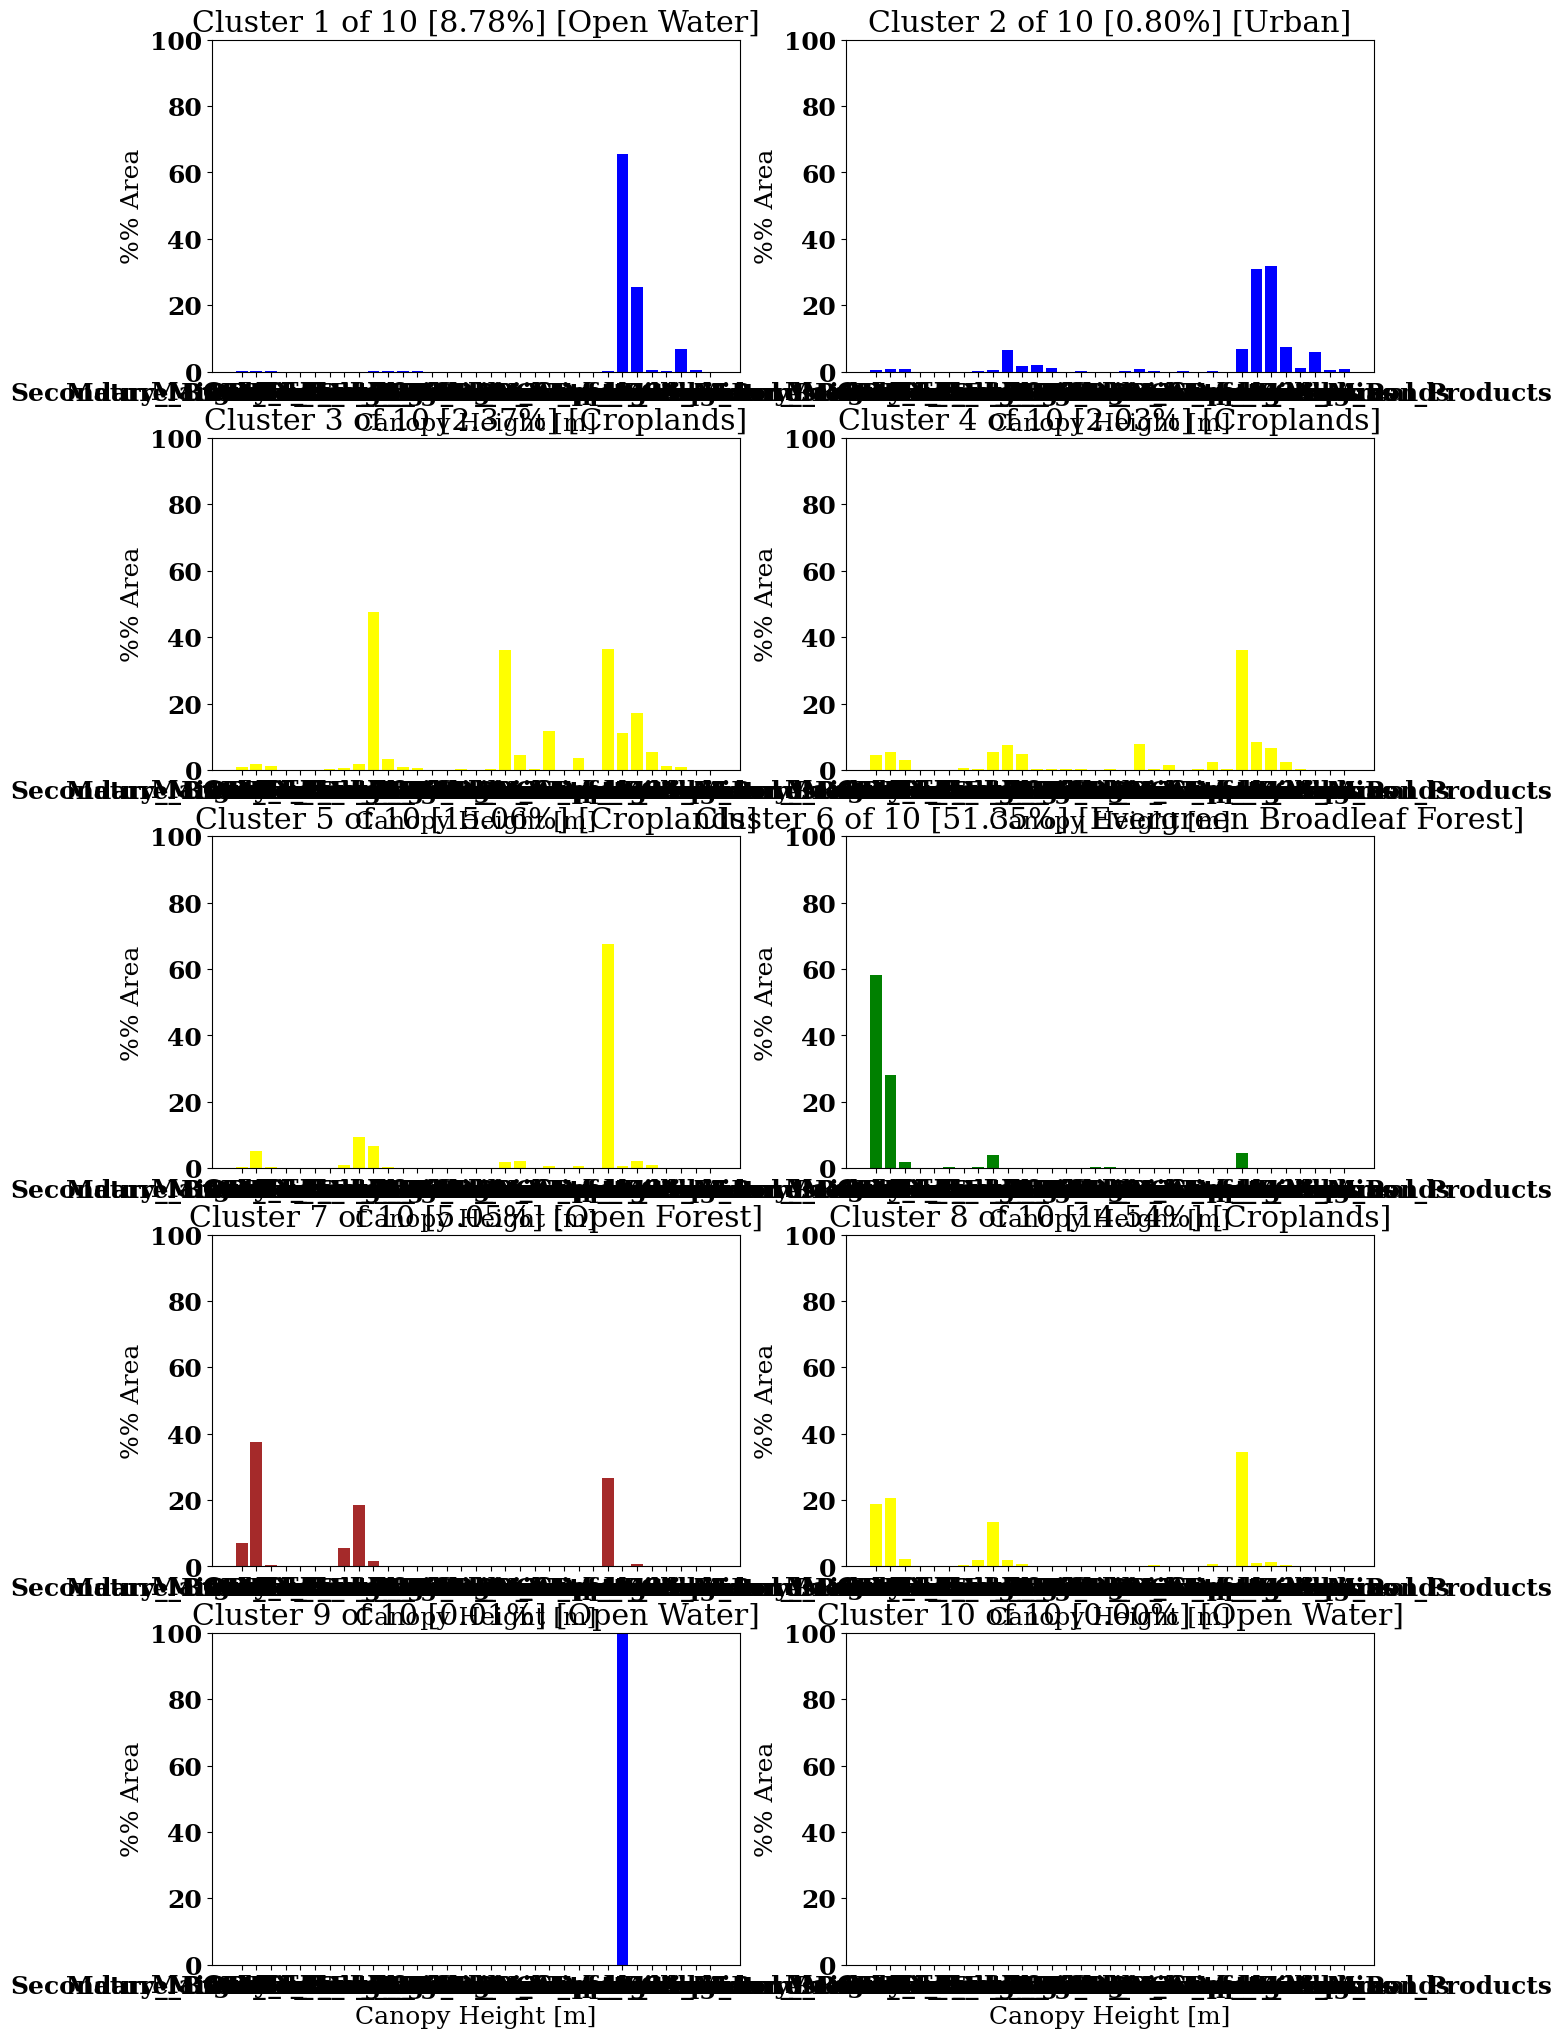

In [36]:
nclust=10
ncols=2
nrows=int(nclust/ncols)
xlabels = ["Mature_Broadleaf_Forest", "Secondary_Mixed_Broadleaf_Forest", "Mangrove_Forest", "Orey_Forest", "Cativo_Forest", "Rafia_Forest", "Coniferous_Forest", "Broadleaf_Forest", "Shrubs_and_Bushes", "Herbaceous_Vegetation", "Flooded_Vegetation", "Rocks_and_Bare_Soils", "Sand_Beaches", "Coffee", "Citric", "Oil_Palm", "Banana", "Permanent_Crops", "Rice", "Sugar_Cane", "Mixed_Horticulture", "Corn", "Pineapple", "Other_Annual_Crops", "Heterogeneous_Area_of_Agricultural_Products", "Pasture", "Water_Bodies", "Urban_Areas", "Infrastructure", "Mining", "Aquaculture_Ponds", "Salt_Mine", "Albinas"]
xtickval = np.arange(1,len(xlabels)+1)
k10_height = pd.read_csv('/home/jbk/projects/climate/tropics/costa_rica_panama/k_10/h10_univar/costa_rica_panama_interp.h10_panamalandcover.report.table', delimiter=" ")
fig, ax = plt.subplots(nrows, ncols, figsize=(15,25))

clr=['blue', 'blue', 'yellow', 'yellow', 'yellow', 'green', 'brown', 'yellow', 'blue', 'blue']
fraction=[8.78, 0.80, 2.37, 2.03, 15.06, 51.35, 5.05, 14.54, 0.01, 0.0]
ylim=[1.5, 0.05, 1.5, 1.5, 1, 1, 1, 1, 1.5, 0.05]

for k in range(nclust):
    r=int(k/ncols)
    c=int(k%ncols)
#    ax[r,c].bar(xtickval, k10_height.iloc[k+1,1:].astype(int)/1000000, color=clr[k])
    ax[r,c].bar(xtickval, k10_height[k10_height.Cluster == k+1][xlabels].values.flatten(), color=clr[k])

    
    ax[r,c].set_ylim([0,100])
    ax[r,c].set_xticks(xtickval)
    ax[r,c].set_xticklabels(xlabels)
    ax[r,c].set_ylabel("%% Area") # [Million Hectares]")
    ax[r,c].set_xlabel("Canopy Height [m]")
    ax[r,c].set_title('Cluster %d of %d [%0.2f%%] [%s]'%(k+1, nclust, fraction[k], lctype[k]))
plt.savefig('h10_panamalandcover.png', dpi=300)


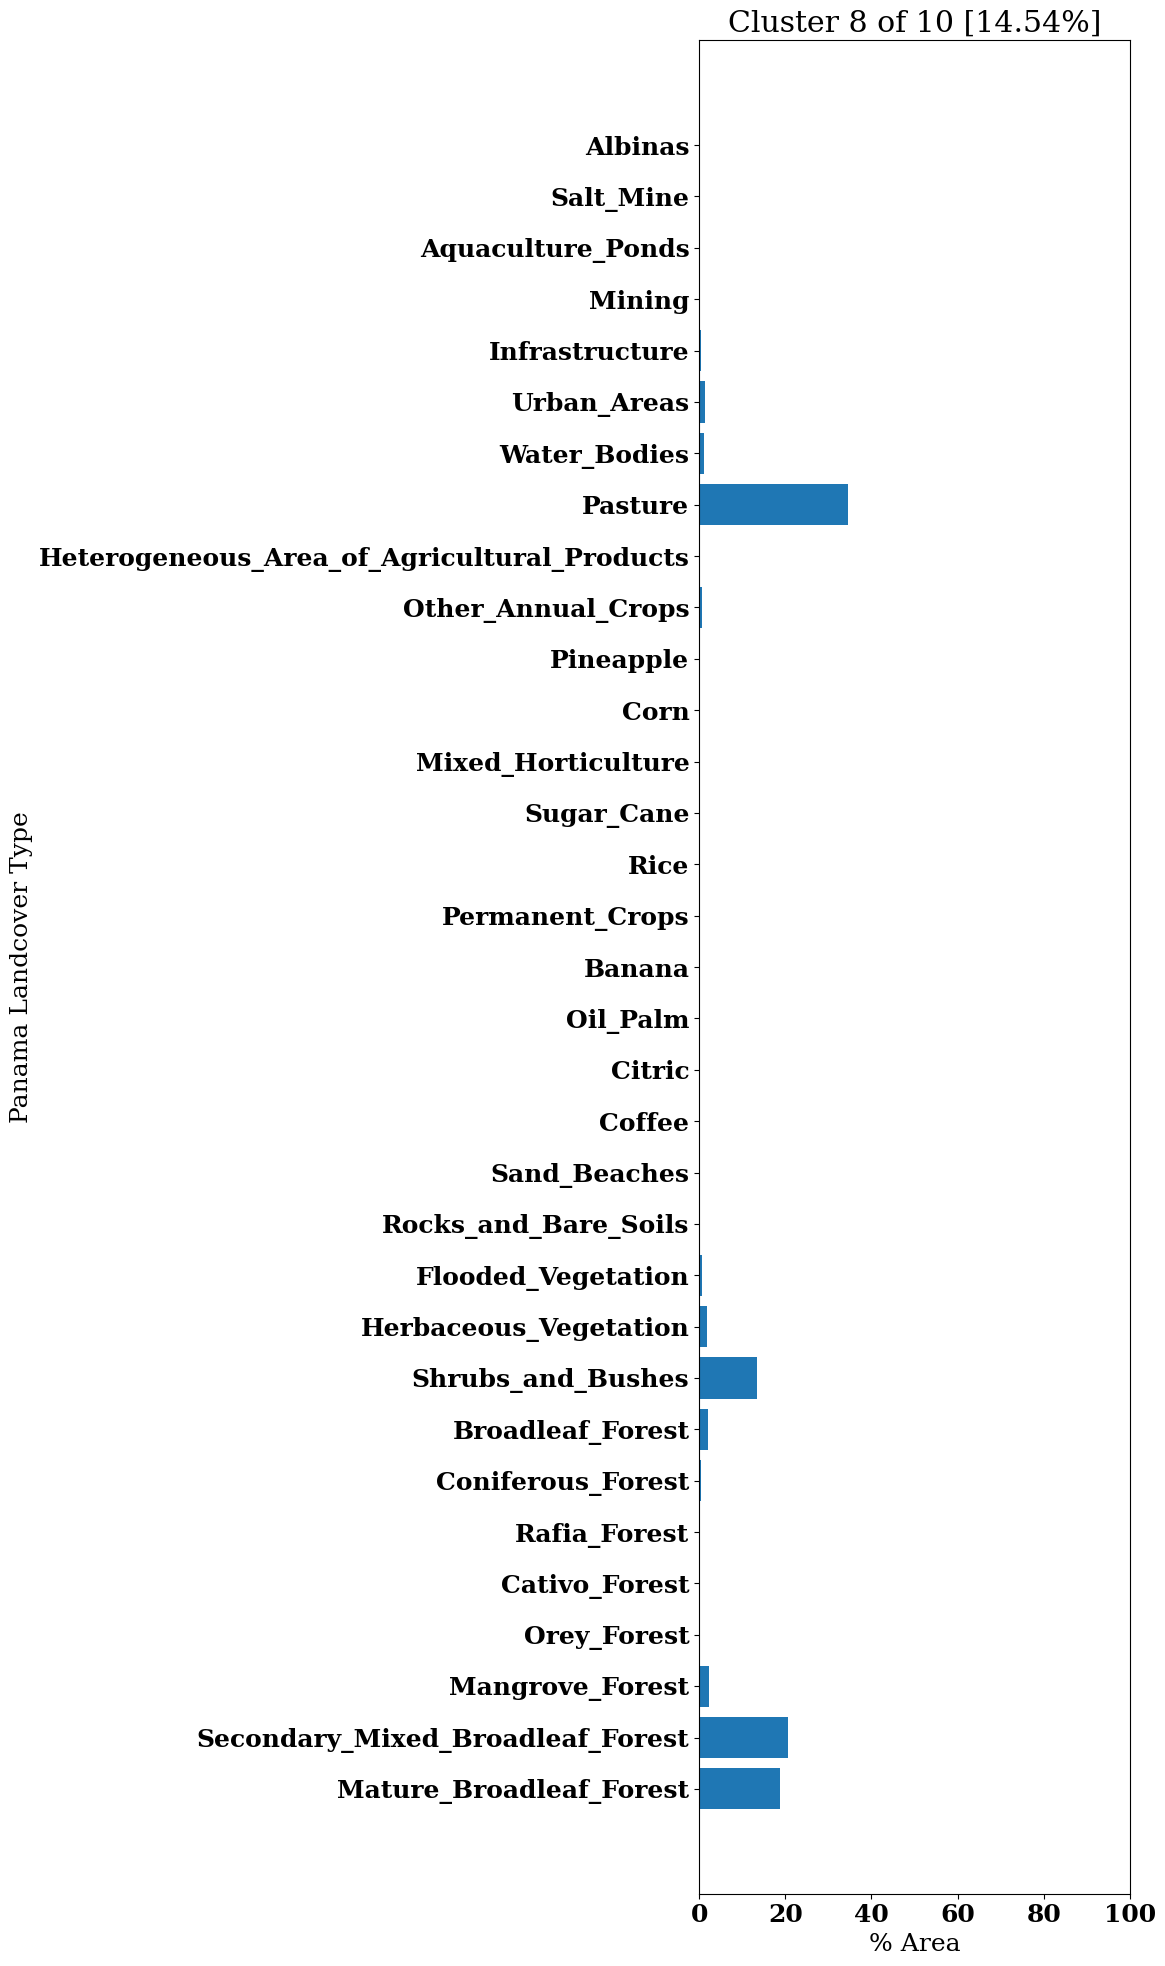

In [37]:

fig, ax = plt.subplots(figsize=(12,20))
k=7
ax.barh(xtickval, k10_height[k10_height.Cluster == k+1][xlabels].values.flatten()) #, xtickval) #, color=clr[k])
ax.set_xlim([0,100])
ax.set_yticks(xtickval)
ax.set_yticklabels(xlabels) #, rotation=90)
ax.set_xlabel("% Area") # [Million Hectares]")
ax.set_ylabel("Panama Landcover Type")
ax.set_title('Cluster %d of %d [%0.2f%%]'%(k+1, nclust, fraction[k]))
plt.tight_layout()
plt.savefig('h10_panamalandcover_%d.png'%(k+1), dpi=300)


[1, 2, 3, 4, 5, 6]